# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
* 분석을 통해 가설 검정하기

# 라이브러리 로드

In [341]:
# 분석 = pandas, 수치계산 = numpy, 시각화 = seaborn
# 노트북 안에서 그래프 시각화 = matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 설정

In [342]:
# 한글이 출력될 수 있도록 폰트 설정
# 운영체제별 설정을 위해 로드
import os
# 윈도우용
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else :
    plt.rc("font", family="Malgun Gothic")
# 마이너스 폰트 깨지는 문제 대처
plt.rc("axes", unicode_minus=False)

In [343]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보임
# 폰트의 주변이 흐릿하게 보이는 걸 방지
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기
* 건강검진정보란 2002년부터 2013년까지 국민건강보험 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상 가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만 40세와 만 66세에 도달한 이들이 받게 되는 생애전환기건강진단 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터이다.
* Encoding을 주의할 것

In [344]:
# 다운로드 파일을 판다스의 read_csv를 통해 읽어오기
# 파일을 읽어온 후 sahpe로 행과 열의 수를 출력
# Pandas는 이 데이터와 같이 100만 건 이상의 데이터에 용이
df = pd.read_csv("data/NHIS_OPEN_GJ_2017_v1.1.csv", encoding="cp949")
df.shape

(1000000, 34)

## 데이터 미리보기

In [345]:
# sample, head, tail을 통해 데이터 미리보기
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   
1  2017        2     1            7    11        180         80  89.0    0.9   
2  2017        3     1            9    41        165         75  91.0    1.2   
3  2017        4     1           11    48        175         80  91.0    1.5   
4  2017        5     1           11    30        165         60  80.0    1.0   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0     Y         Y      NaN    NaN      NaN   
1    1.2  ...   27.0   3.0     N         Y      NaN    NaN      NaN   
2    1.5  ...   68.0   1.0     N         N      NaN    NaN      NaN   
3    1.2  ...   18.0   1.0     N         Y      NaN    NaN      NaN   
4    1.2  ...   25.0   1.0     N         Y      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석     데이터공개일자  
0           NaN    Y  2018-11-26  
1           NaN  NaN  2018-11-26  
2           NaN  NaN  2018-11-26  
3           NaN    N  2018-11-26  
4           NaN    N  2018-11-26  

[5 rows x 34 columns]

In [346]:
df.tail()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
999995  2017   999996     1           10    48        175         80  92.1   
999996  2017   999997     1            8    41        170         75  86.0   
999997  2017   999998     2            9    26        155         50  68.0   
999998  2017   999999     1            6    29        175         60  72.0   
999999  2017  1000000     1           11    41        160         70  90.5   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
999995    1.5    1.5  ...   27.0   1.0     N         N      NaN    NaN   
999996    1.0    1.5  ...   15.0   1.0     N         N      NaN    NaN   
999997    1.0    0.7  ...   17.0   3.0     Y         N      NaN    NaN   
999998    1.5    1.0  ...   17.0   1.0     N         N      NaN    NaN   
999999    1.0    1.5  ...   36.0   3.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
999995      NaN           NaN  NaN  2018-11-26  
999996      NaN           NaN  NaN  2018-11-26  
999997      NaN           NaN  NaN  2018-11-26  
999998      NaN           NaN  NaN  2018-11-26  
999999      NaN           NaN  NaN  2018-11-26  

[5 rows x 34 columns]

In [347]:
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
944282  2017   944283     2            9    11        150         55  79.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
944282    0.9    0.7  ...   15.0   1.0     Y         Y      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석     데이터공개일자  
944282      NaN           NaN   N  2018-11-26  

[1 rows x 34 columns]

# 기본정보 보기

In [348]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량 등을 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [349]:
# 컬럼 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [350]:
# dtype를 통해 데이터 형식 출력
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

# 결측치 보기

In [351]:
# True + True + False = 2
# isnull을 통해 결측치를 bool값으로 표시하고 sum을 하여 컬럼마다 결측치 수 세기
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

In [352]:
# isna로도 결측치 여부 확인, sum을 통해 결측치 집계
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

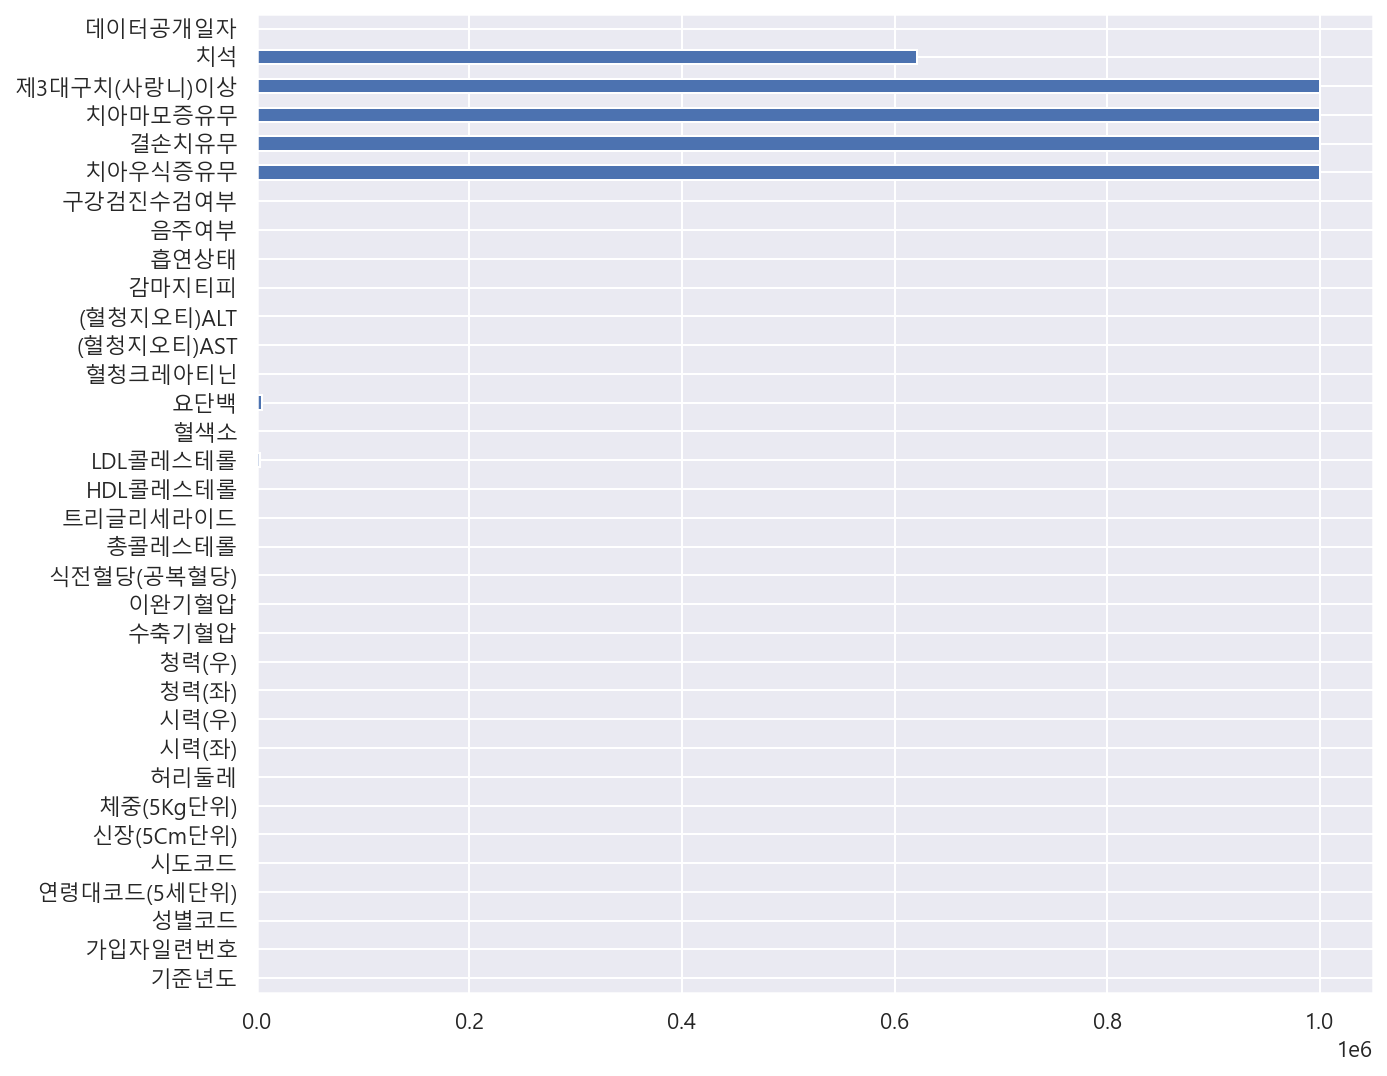

In [353]:
# 판다스에 내장된 plot을 통해 시각화
df.isnull().sum().plot.barh(figsize=(10, 9))

# 일부 데이터 요약하기

In [354]:
# 여러 컬럼 가져오기
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 가져와 미리보기\
# 2개 이상을 불러올때에는 List형태인 [[]]로 불러와야함.
# []하나로부르면 series 형태, 2개로 부르면 dataframe형태로 출력
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

(혈청지오티)ALT  (혈청지오티)AST
0        35.0        21.0
1        36.0        20.0
2        32.0        47.0
3        34.0        29.0
4        12.0        19.0

In [355]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999958 non-null  float64
 1   (혈청지오티)AST  999959 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [356]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999958.000000  999959.000000
mean       25.749509      25.994671
std        26.294770      23.587469
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        29.000000      28.000000
max      7210.000000    9999.000000

# value_counts로 값 집계하기


In [357]:
# value_counts는 category형태나 text데이터의 빈도수를 세는 용도
# value_counts를 통해 성별코드로 그룹화 및 갯수 집계
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [358]:
# value_counts를 통해 흡연상태로 그룹화 및 갯수 집계
df["흡연상태"].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

# groubby 와 pivot_table 이용하기

## groubby

In [359]:
# groupby를 통해 데이터 그룹화
# 성별코드로 그룹화 한 데이터 세기
# df.groupby? - Example을 참조하기 (처음에 실습할경우)
# value_counts와 차이점은 다양한 연산을 할 수 있다는 점 (count 뿐만아니라)
# 여러개의 값을 한 번에 볼 수 있다는 점도 차이점
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [360]:
# 성별코드와 음주여부로 그룹화하고 갯수 세기
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [361]:
# 성별코드와 음주여부로 그룹화 및 감마지티피의 평균 구하기
df.groupby(["성별코드", "음주여부"])["감마지티피"].count()

성별코드  음주여부
1     N       173604
      Y       356576
2     N       326813
      Y       142429
Name: 감마지티피, dtype: int64

In [362]:
# 성별코드와 음주여부로 그룹화 및 감마지티피 요약수치 구하기
# max에 대한 부분은 공공데이터 포털에서 데이터 설명 찾아보기
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    N     173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     Y     356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    N     326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     Y     142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [363]:
# agg를 사용하면 여러 수치를 함께 구하는 것이 가능
# aggregate
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count","mean","median"])

count       mean  median
성별코드 음주여부                           
1    N     173604  34.739868    25.0
     Y     356576  56.610981    37.0
2    N     326813  22.612408    17.0
     Y     142429  25.001018    17.0

## pivot_table
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [364]:
# 음주여부에 따른 그룹화된 수를 피봇테이블로 구하기
# pivot은 연산을 하지 않고 형태만 바꾸려 할 때
# pivot_table은 연산을 할 때
# groupby보다 pivot_table이 결과값이 조금 더 직관적
# 음주여부에 따라 건강검진 결과가 달라지는가?
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

가입자일련번호
음주여부         
N      500439
Y      499025

In [365]:
# 음주여부에 따른 감마지티피의 평균구하기
# default aggfunc 는 평균
pd.pivot_table(df, index="음주여부", values="감마지티피")

감마지티피
음주여부           
N     26.819650
Y     47.588675

In [366]:
# aggfunc에 여러 값을 한 번에 지정가능
pd.pivot_table(df, index="음주여부", values="감마지티피",
               aggfunc=["mean","median"])

mean median
          감마지티피  감마지티피
음주여부                  
N     26.819650   19.0
Y     47.588675   30.0

In [367]:
# aggrunc에 describe를 사용해 통계요약값 한 번에 산출 가능
pd.pivot_table(df, index="음주여부", values="감마지티피",
               aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부                                                              
N     14.0  19.0  29.0  500417.0  999.0  26.819650  1.0  30.639714
Y     18.0  30.0  52.0  499005.0  999.0  47.588675  1.0  63.056912

In [368]:
# 성별코드, 음주여부에 따른 감마지티피 값의 평균 구하기
pd.pivot_table(df, index=["성별코드","음주여부"], values="감마지티피",
               aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    N     18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     Y     24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    N     13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     Y     13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

# 전체 데이터 시각화 하기
* 100만개가 넘는 데이터를 시각화 할 시, 되도록 groupby 혹은 pivot_table로 연산 후 시각화 권장
* 100만개가 넘는 데이터를 seaborn과 같은 고급 통계 연산 그래프 실행 시 속도가 많이 느림

## 히스토그램
* 판다스 info 기능을 통해 대부분 수치 데이터인 것을 확인 가능
* 히스토그램 사용 시, 수치데이터를 bin의 갯수만큼 그룹화로 도수분포표를 만든 후 결과 시각화
* 현 데이터가 수치데이터가 많기 때문에 판다스와 hist를 사용해 히스토그램 생성

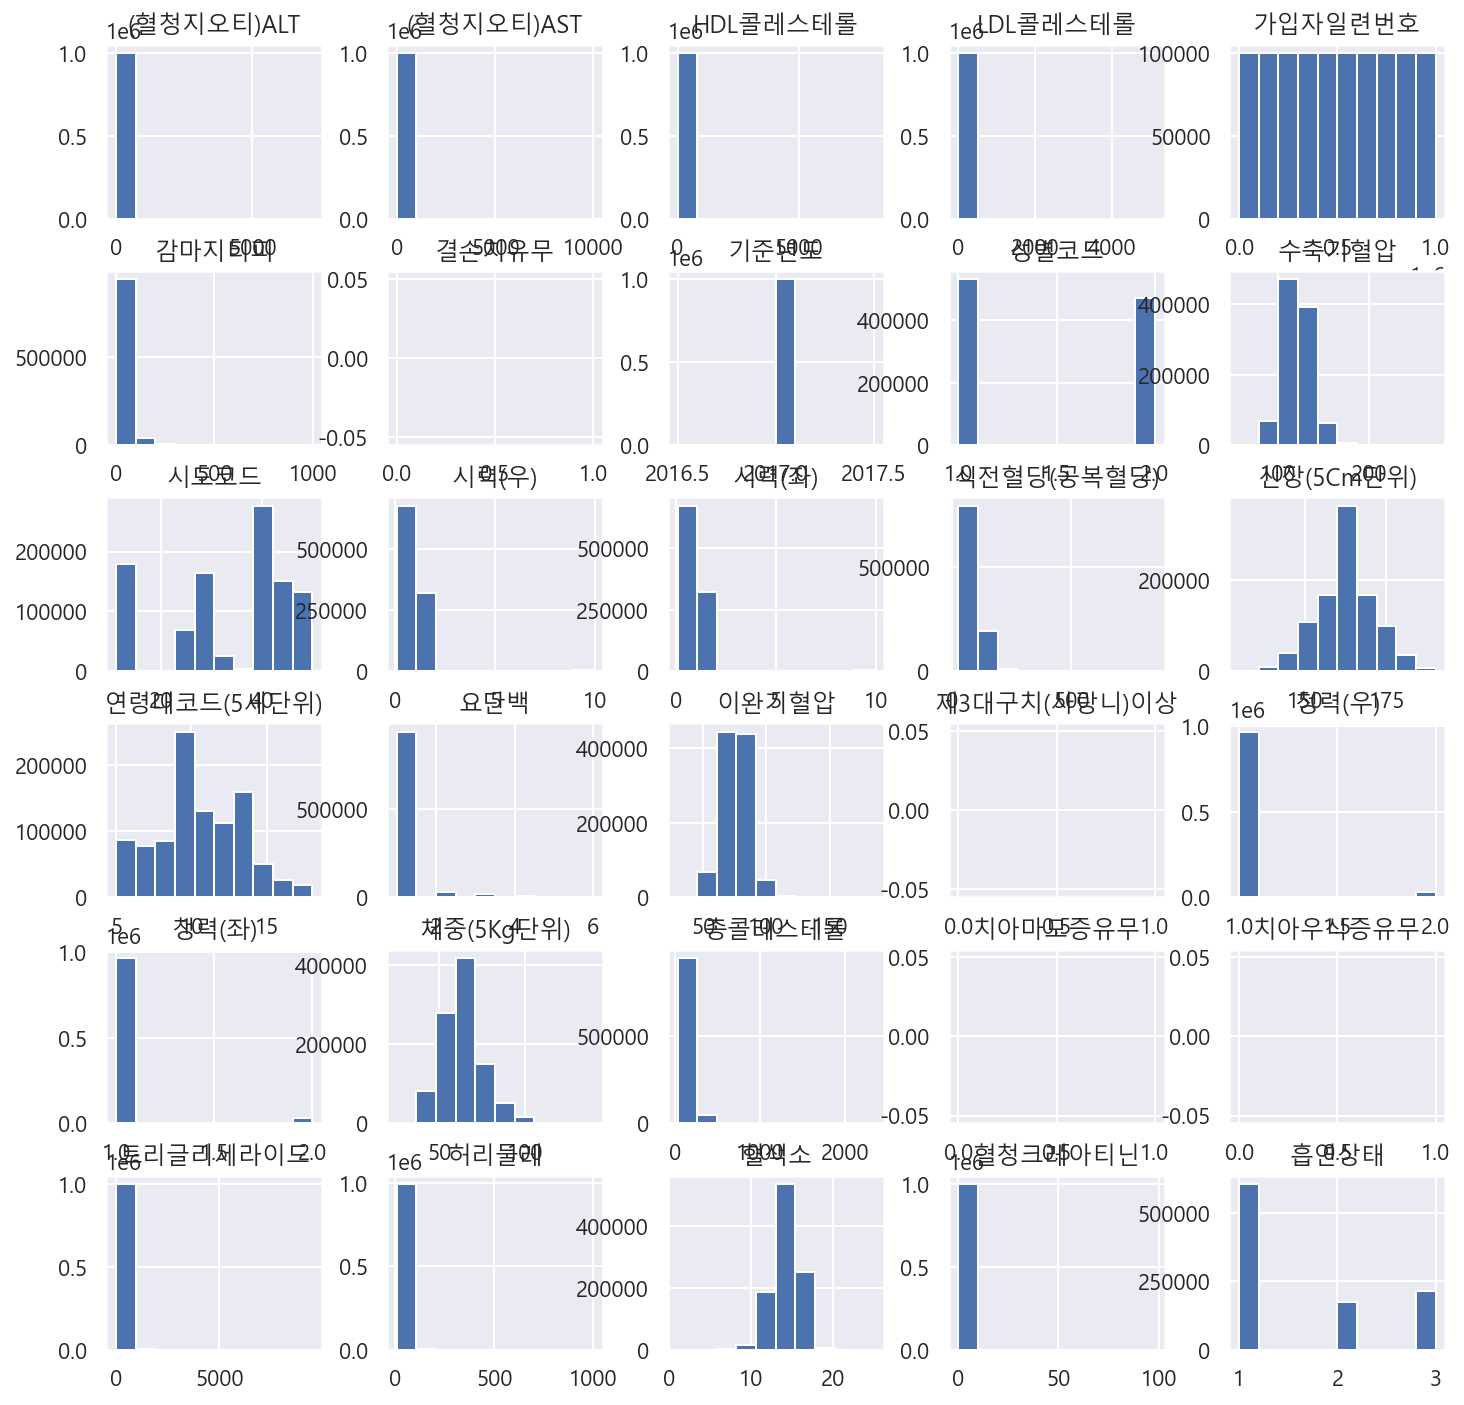

In [369]:
# 전체 데이터에 대한 히스토그램 출력
# df.info()로 데이터 특성 파악 - 수치데이터가 많다.
# 변수 할당 시, 시각화 결과값만 보임
h = df.hist(figsize=(12,12))

## 슬라이싱을 사용해 히스토그램 그리기
* 슬라이싱 기능을 사용해서 데이터 나누어 그리기
* 슬라이싱 사용시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능
* iloc[행,열] 순으로 인덱스를 쓰면 인덱스만 불러오며, 전체데이터는 [:,:]을 사용
* 슬라이싱을 해주는 대괄호 안의 콜론 앞 뒤에 숫자 기입 시, 시작인덱스:끝나는 인덱스(+1) 지정가능

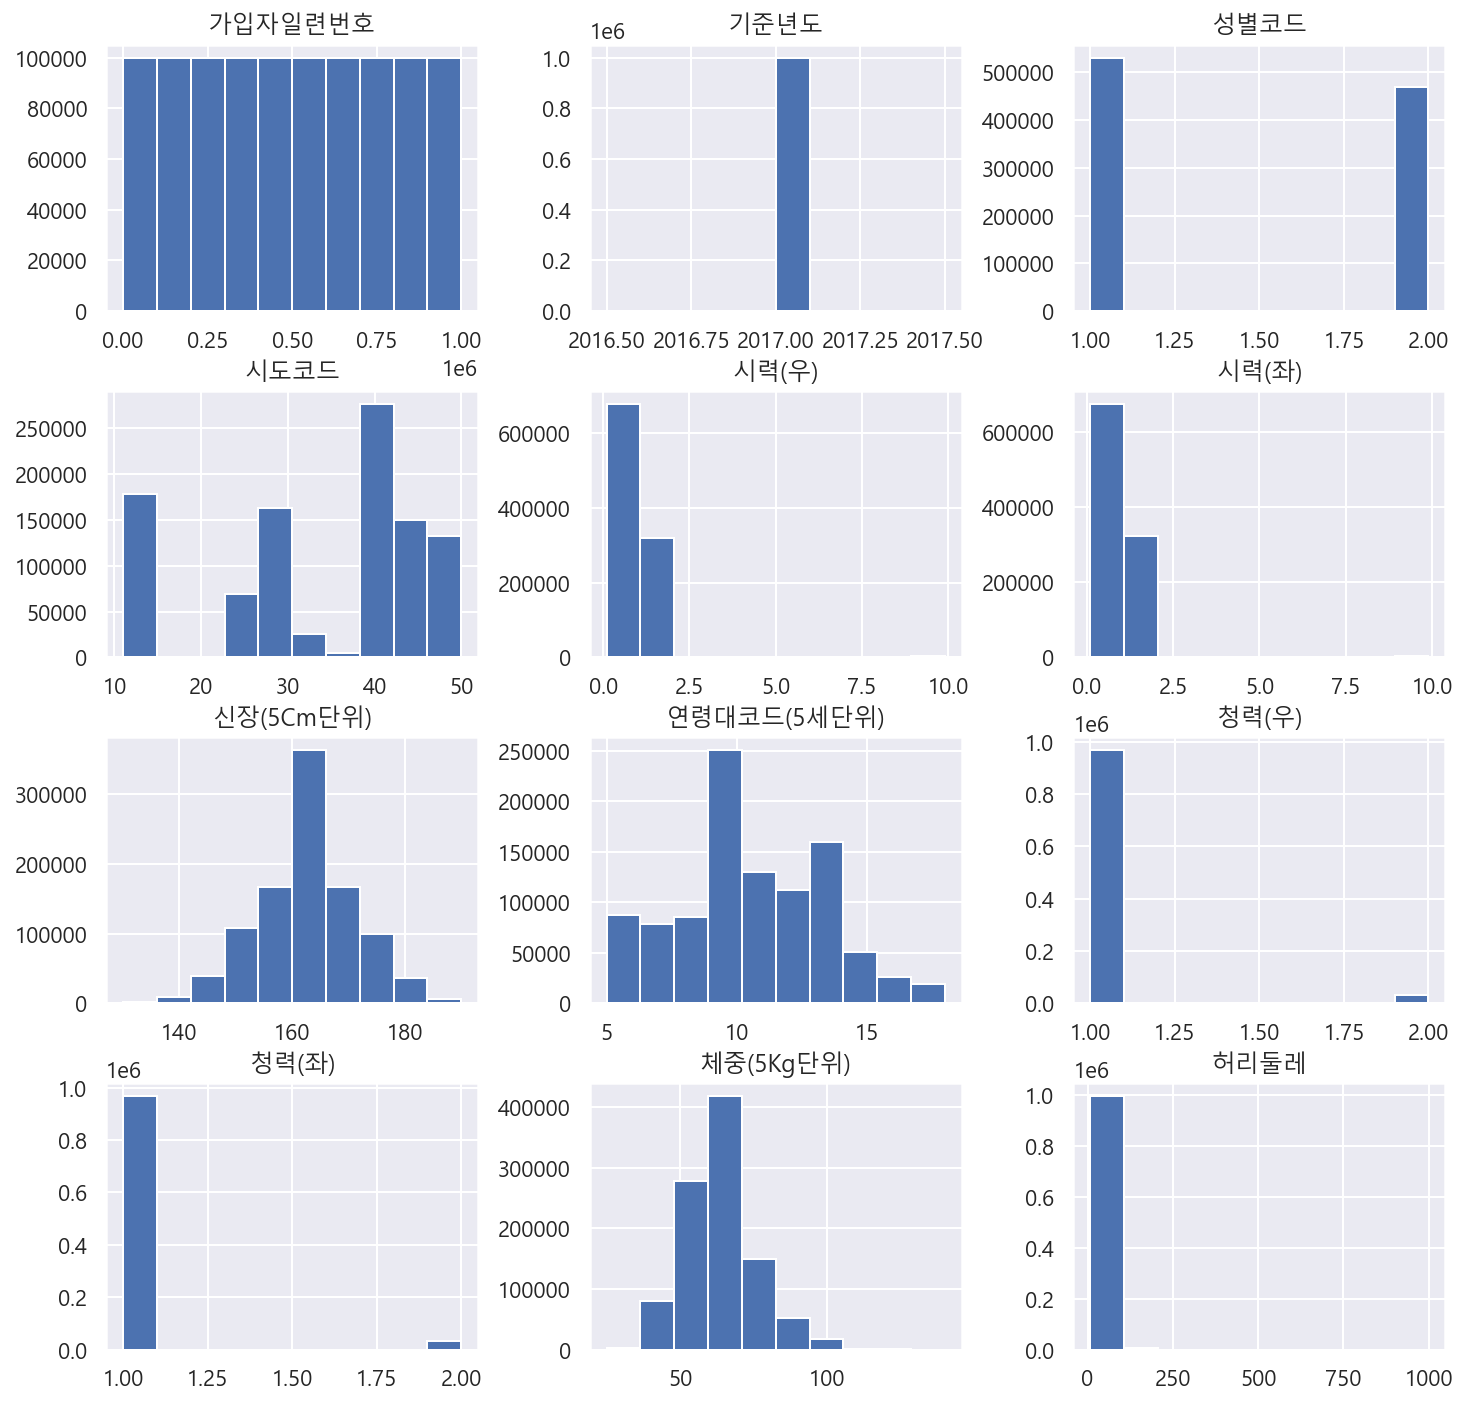

In [370]:
# 슬라이싱을 사용해 12개 컬럼에 대한 데이터로 히스토그램 그리기
# [행,열]
h = df.iloc[:,:12].hist(figsize=(12,12))

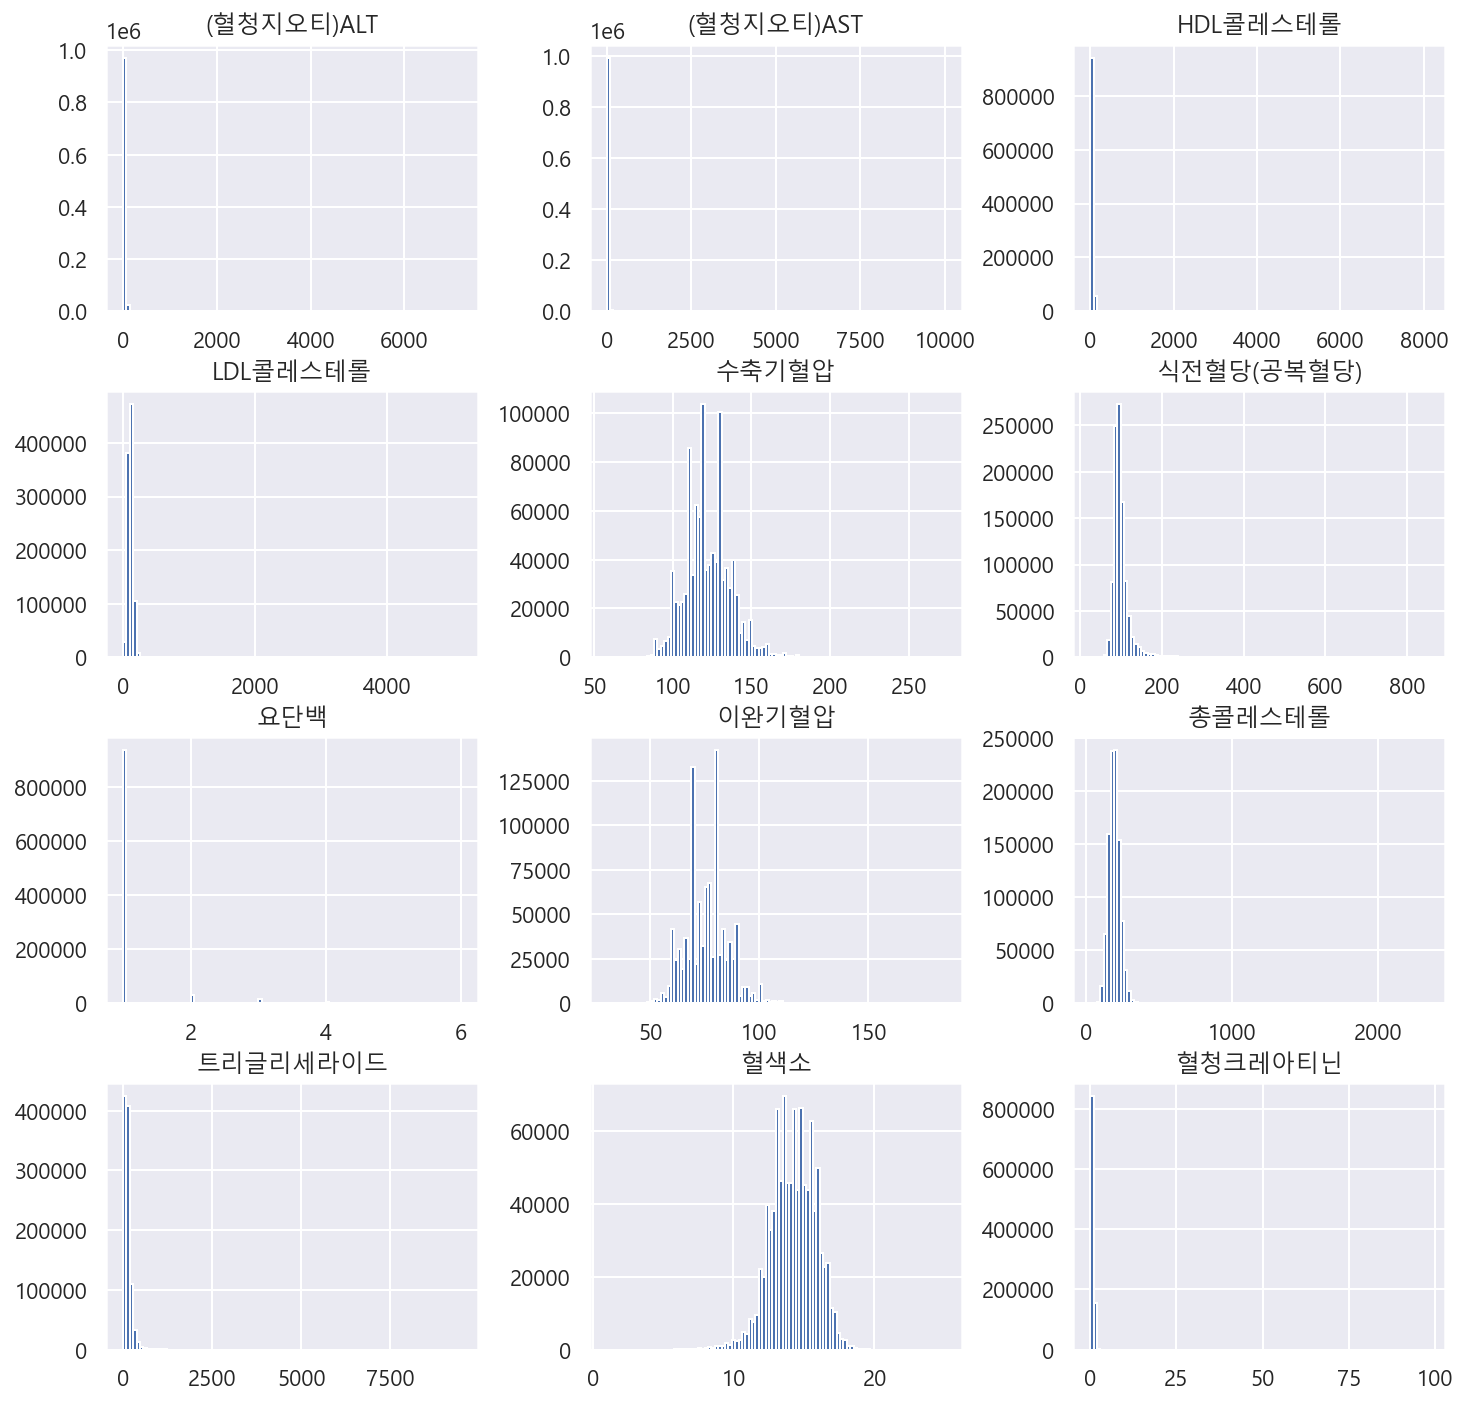

In [371]:
# 슬라이싱을 사용해 앞에 12번째에서 23번째까지 (12:24) 컬럼에 대한 데이터 히스토그램
# 자세하게 보려면 bins를 사용 가능
h = df.iloc[:, 12:24].hist(figsize=(12,12), bins=100)

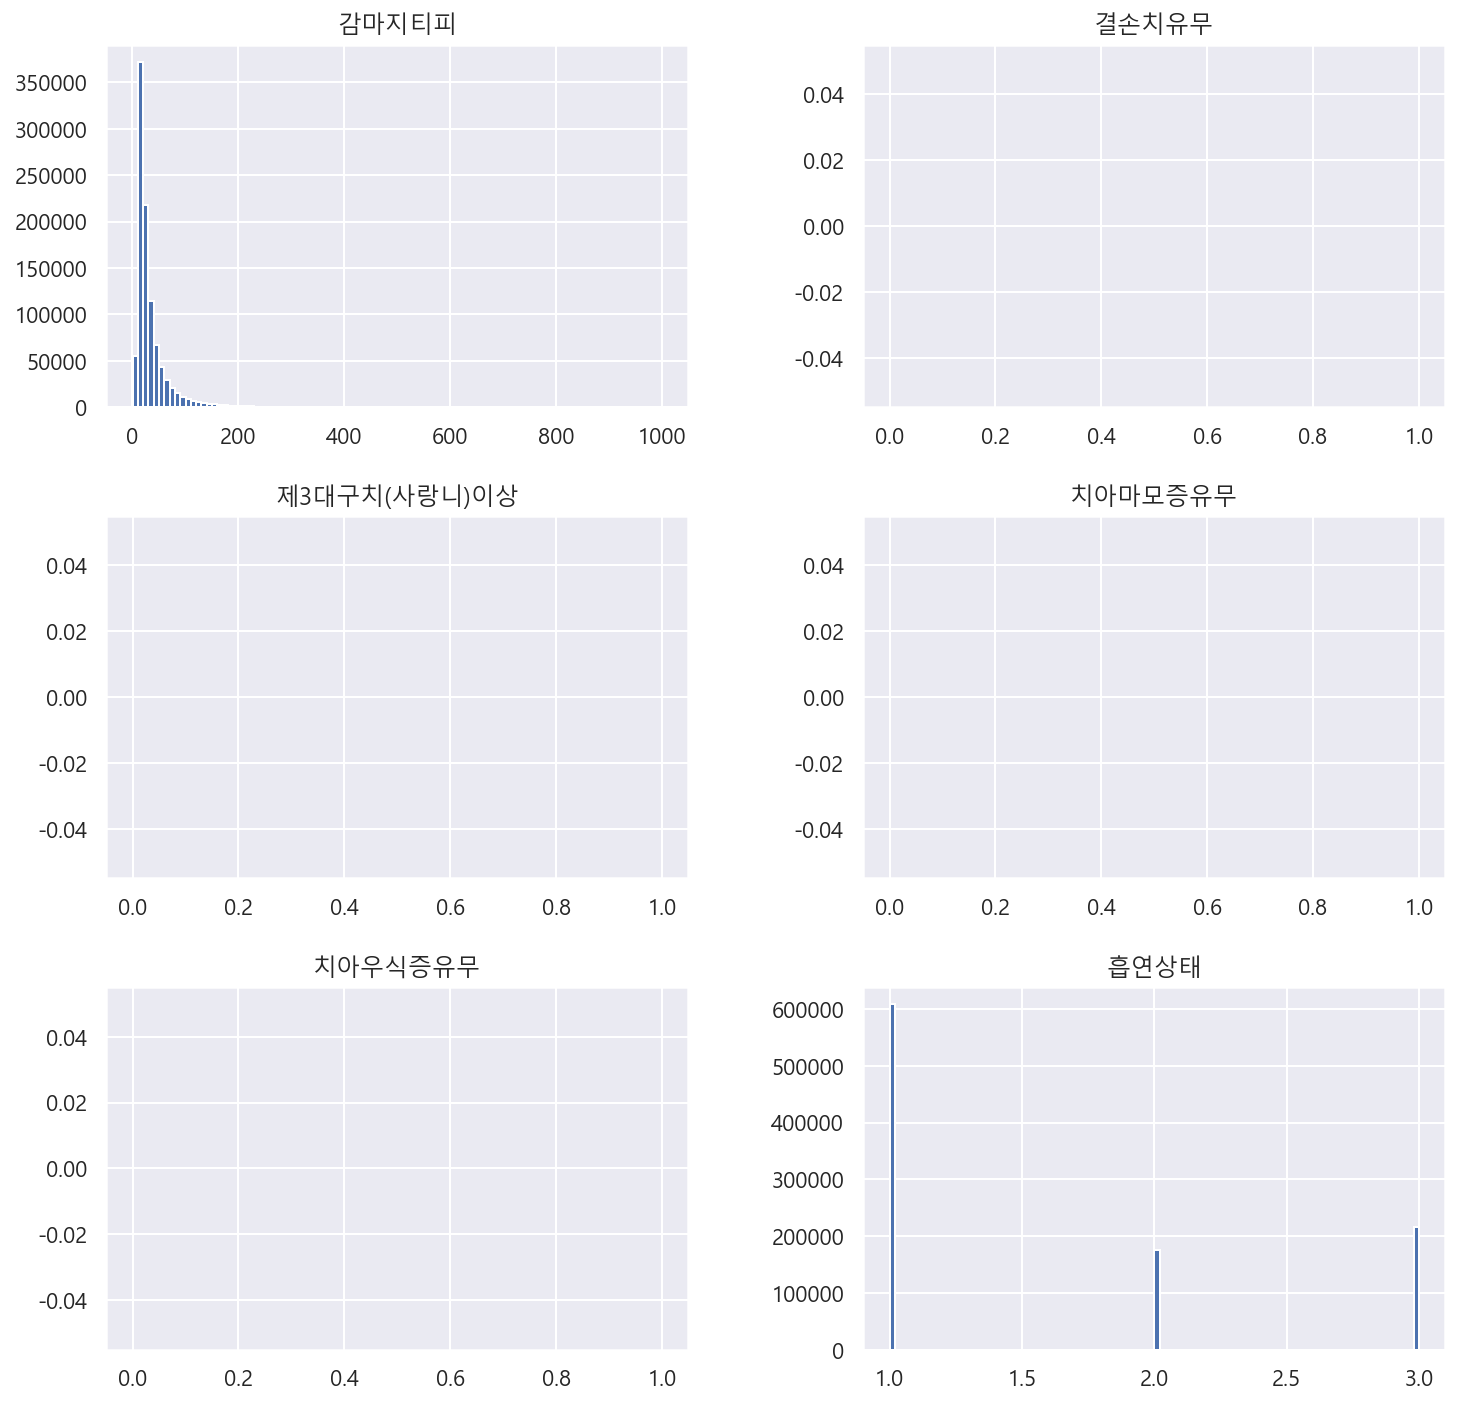

In [372]:
# 슬라이싱을 사용해 24번째 ~ 마지막 (24:) 컬럼에 대한 데이터 히스토그램
h = df.iloc[:, 24:].hist(figsize=(12,12), bins=100)

# 샘플데이터 추출하기
* seaborn의 그래프는 내부에서 수학적 연산이 되어 데이터가 많을시 소요시간이 많아짐.
* 전체 데이터를 사용하면 너무 느리기 때문에 샘플링해서 사용

In [373]:
# df.sample을 통해 일부 데이터만 샘플데이터를 추출
# random_state를 사용해 샘플링되는 값을 고정
# 실험을 통제하기 위해 random_state를 고정
# 여기서는 1을 사용. 이 값은 높고 낮음에 상관 없이 값을 고정시키는 역할

df_sample = df.sample(1000, random_state = 1)
df_sample.shape

(1000, 34)

# 데이터 시각화 도구 seaborn 사용하기
* https://seaborn.pydata.org/
* seaborn은 https://matplotlib.org/ 을 사용하기 쉽게 만들어 졌으며, 간단하게 고급 통계 연산 가능

# 범주형(카테고리) 데이터 시각화
* countploy은 범주형 데이터의 수를 더한 값을 그래프로 표현
* value_counts로 구한 값을 기각화 한다고 볼 수 있음

## countplot - 음주여부

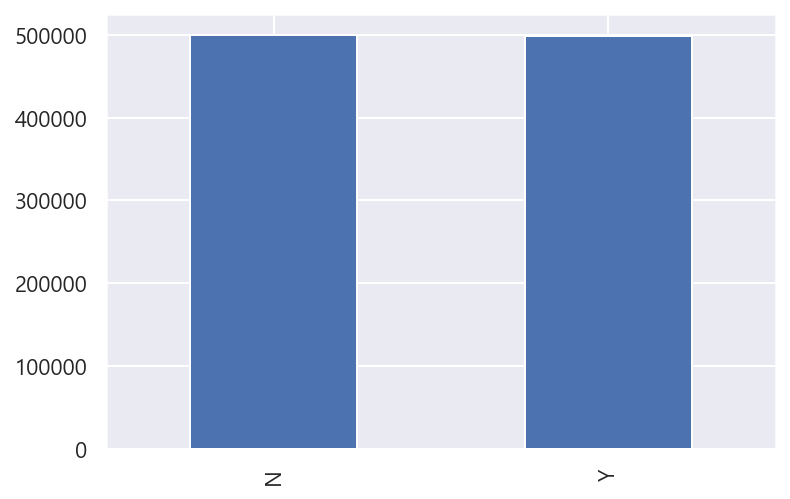

In [374]:
# 음주여부에 따른 countplot을 그리기
# pandas
df["음주여부"].value_counts().plot.bar()

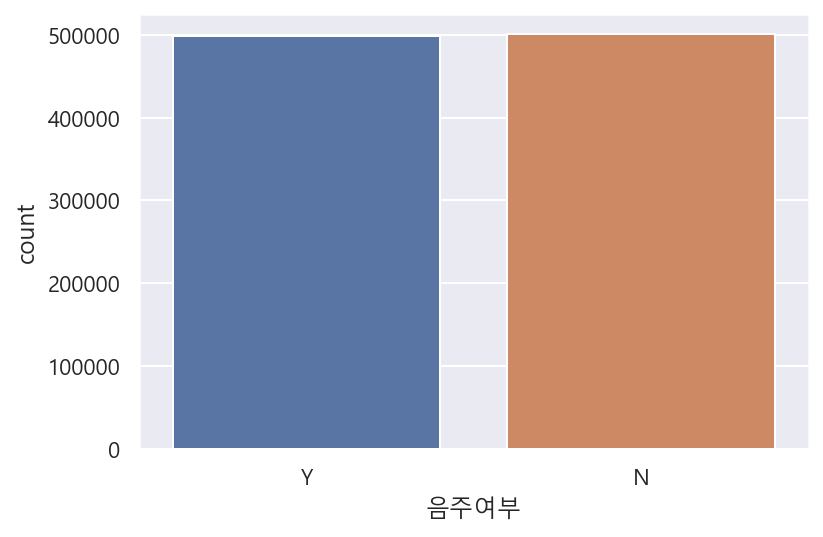

In [375]:
# seaborn
sns.countplot(x="음주여부", data=df)

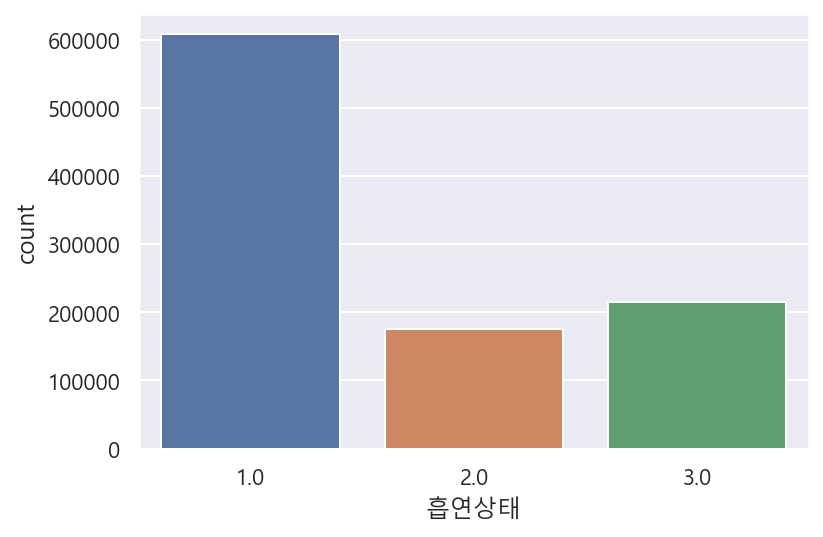

In [376]:
sns.countplot(x="흡연상태", data=df)

## hue 옵션 사용하기

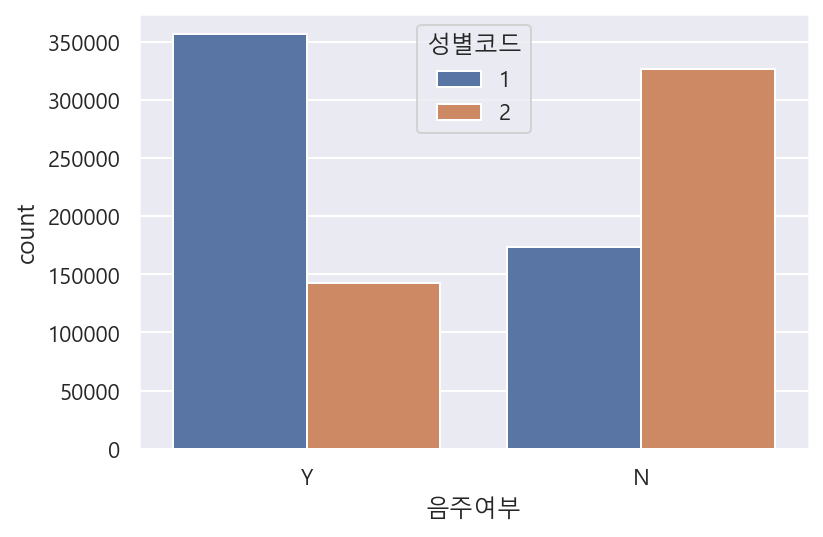

In [377]:
# 음주여부에 따른 countplot을 그리고 hue를 사용해 성별코드로 색상 구분
# hue는 포토샵에 있는 hue 메뉴 떠올리기, 색상 의미
# 또, seaborn에서 제공하는 폰트 설정 사용 가능
# 다만, 이 때, seaborn의 기본 스타일이 적용되는 것을 확인하기
# Window
sns.set(font_scale = 1, font="Malgun Gothic")
sns.countplot(data=df, x="음주여부", hue="성별코드")

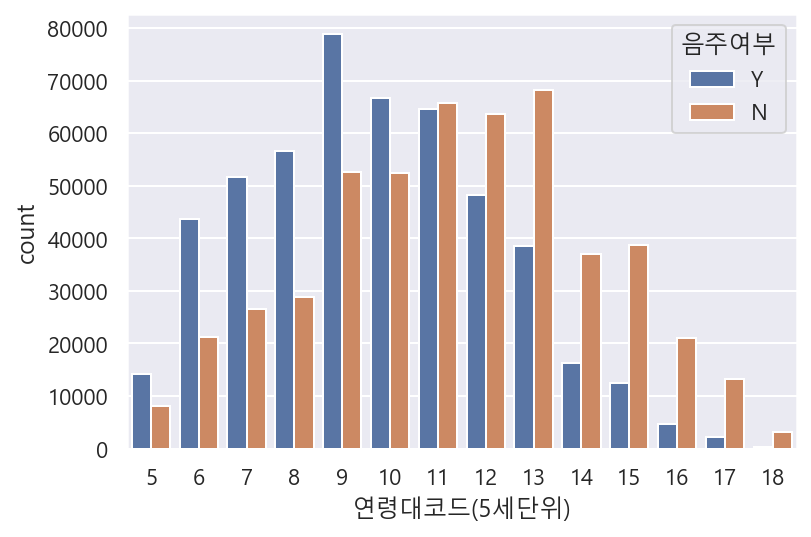

In [378]:
# countplot으로 연령대별 음주여부 파악
# hue를 사용해 다른 색상으로 표현
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

## countplot - 키와 몸무게
* 키와 몸무게는 연속형 데이터
* 하지만 이 데이터는 5cm, 5kg 단위로 묶여 있음
* 이런 상황은 연속형 데이터 보다는 범주형 데이터로 볼 수 있음

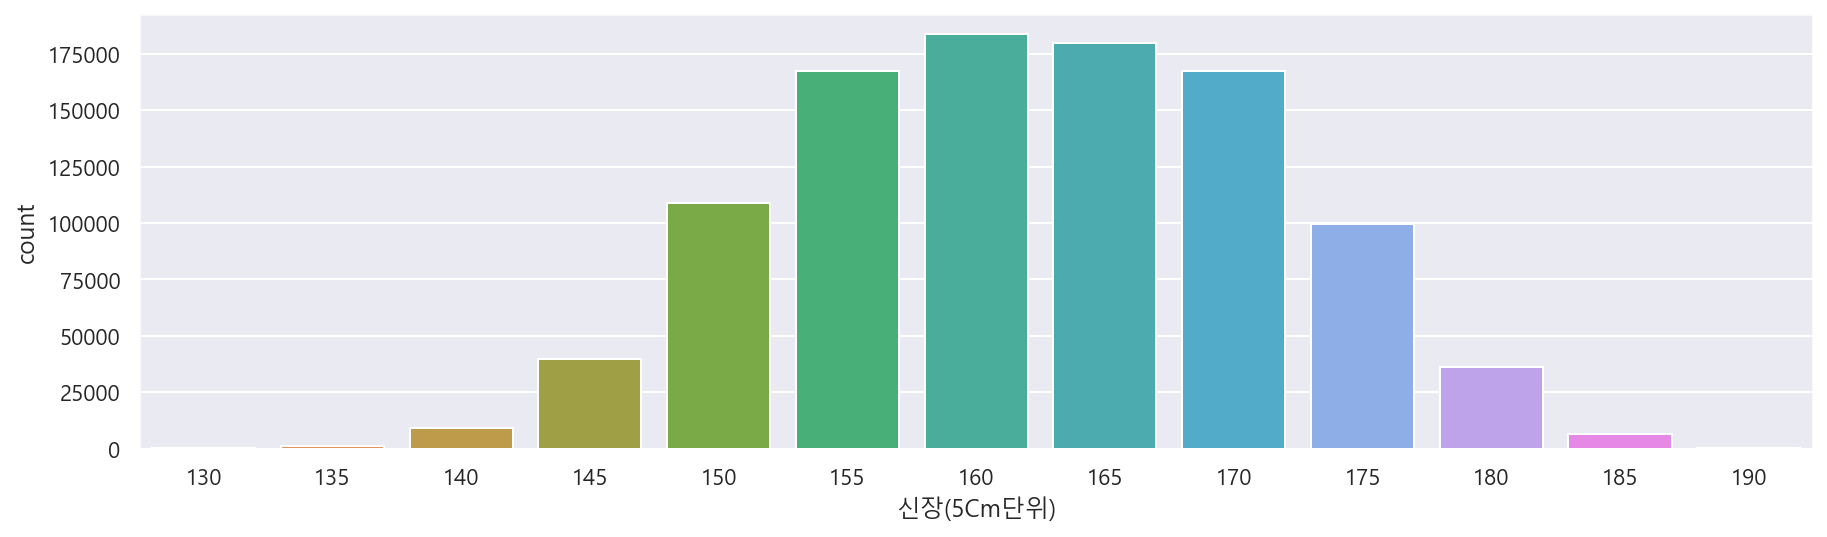

In [379]:
# countplot으로 키를 보기
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="신장(5Cm단위)")

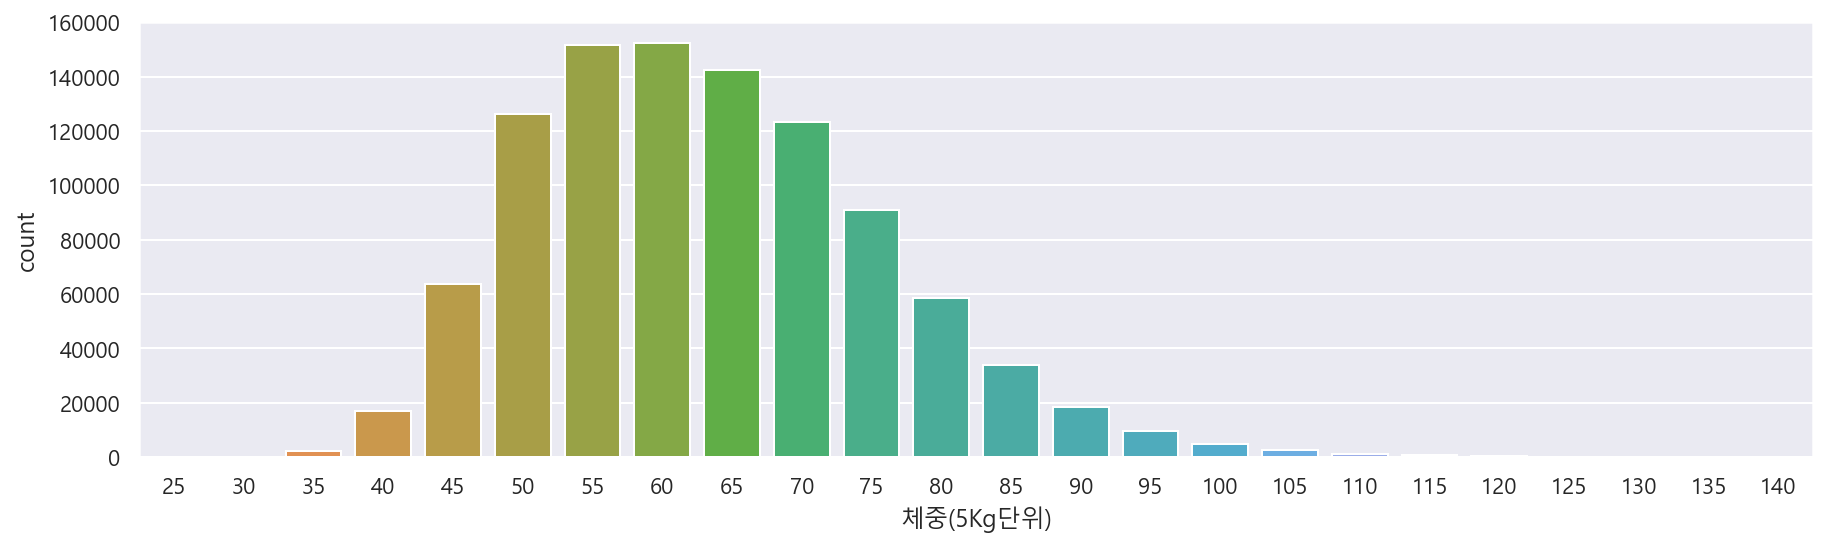

In [380]:
# countplot으로 체중 보기
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg단위)")

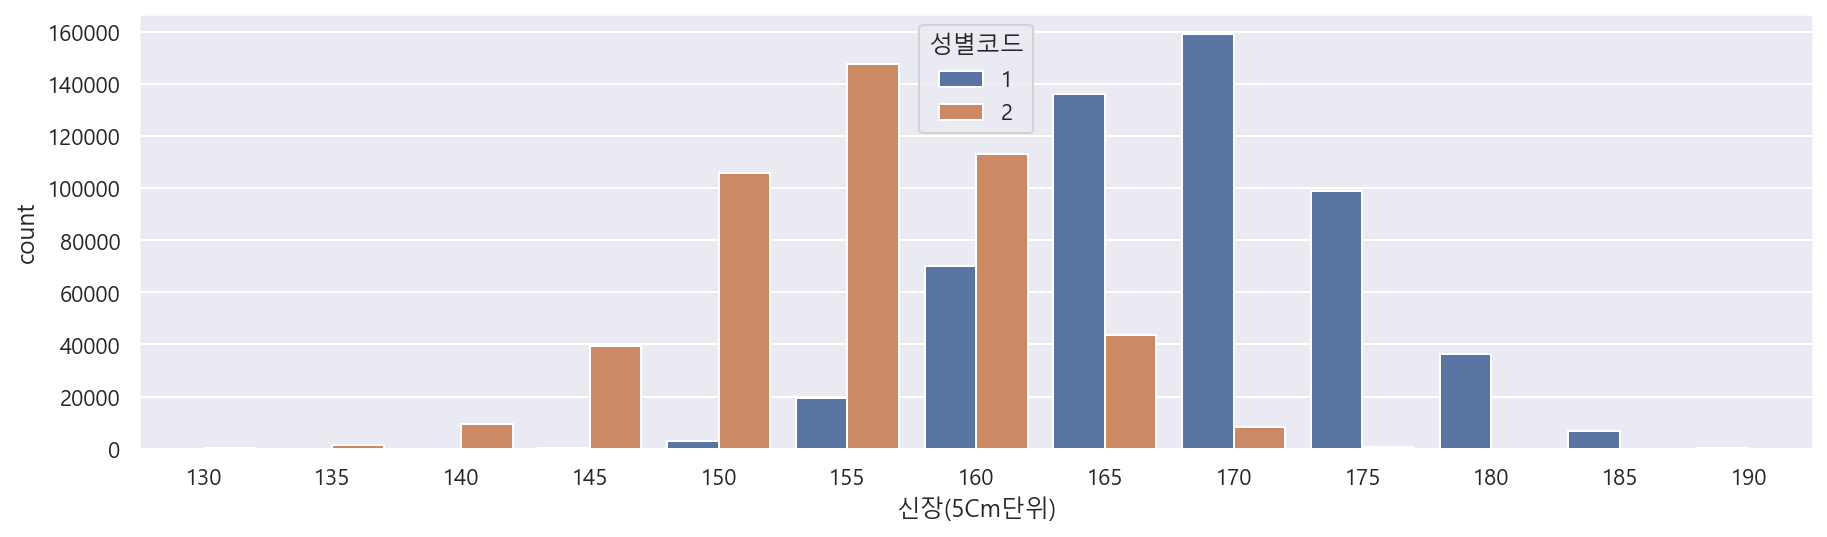

In [381]:
# countplot으로 신장(5Cm단위)를 보기
# 성별에 따른 키의 차이 보기
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

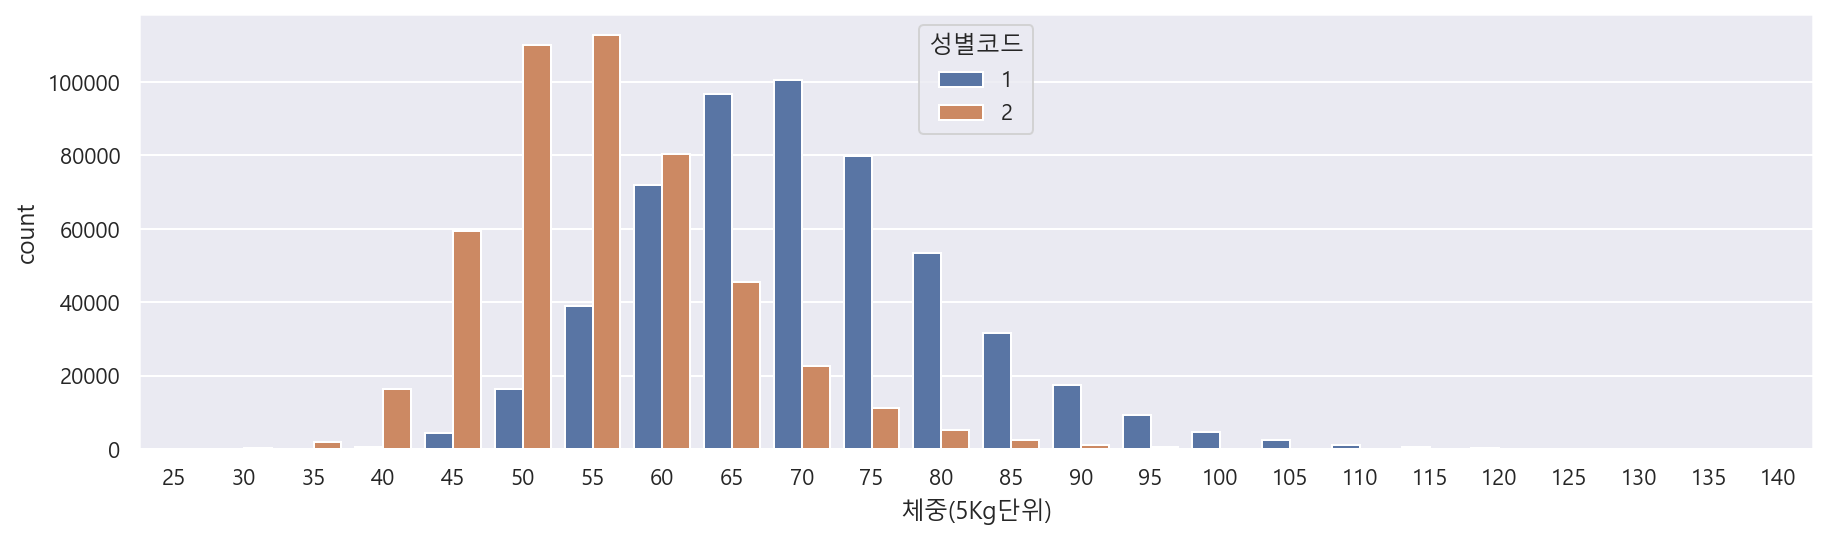

In [382]:
# 성별에 따른 체중 차이 보기
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

## barplot - 수치형 vs 범주형 데이터 시각화

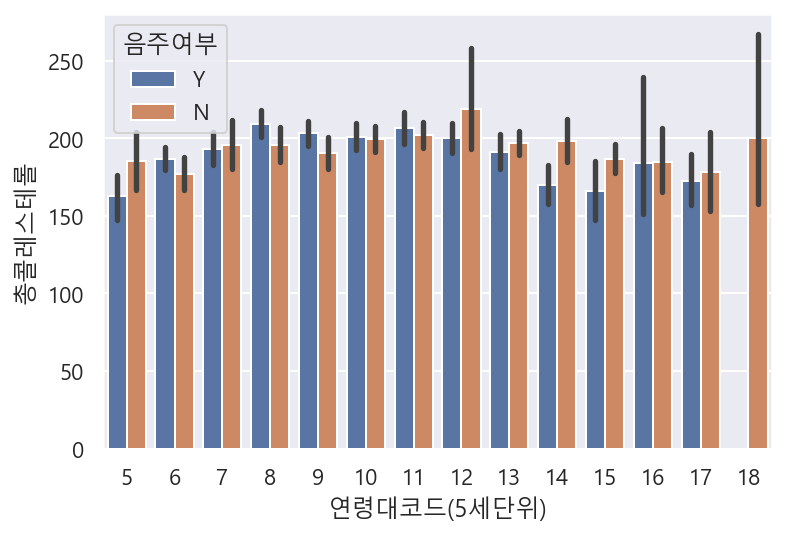

In [383]:
# 연령대와 총 콜레스테롤 보기
# hue로 생상 다르게 표현, 음주 여부를 함께 보기
# 먼저 샘플 데이터로 그려보고 전체 데이터 그리기 (속도 문제)
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

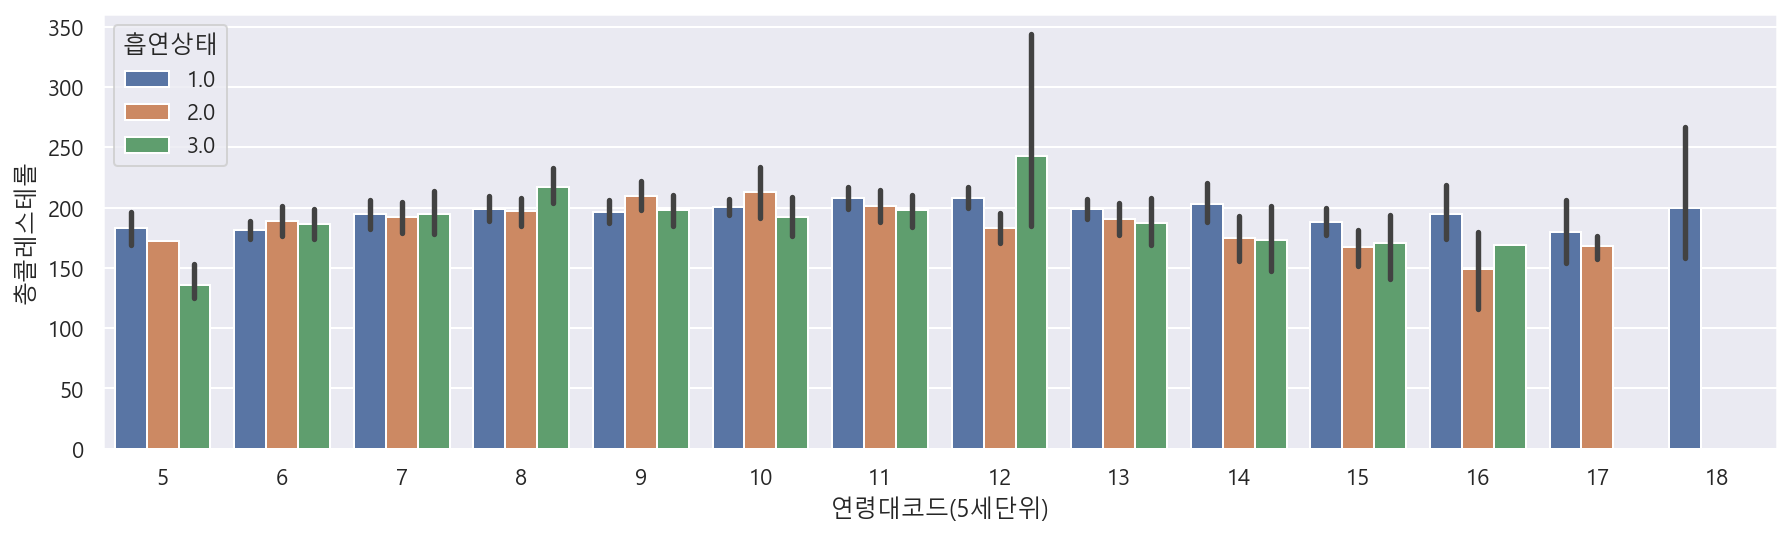

In [384]:
# 연령대와 총 콜레스테롤 보기
# 콜레스테롤과 연령대코드(5세단위)를 흡연상태에 따라 barplot으로 그리기
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

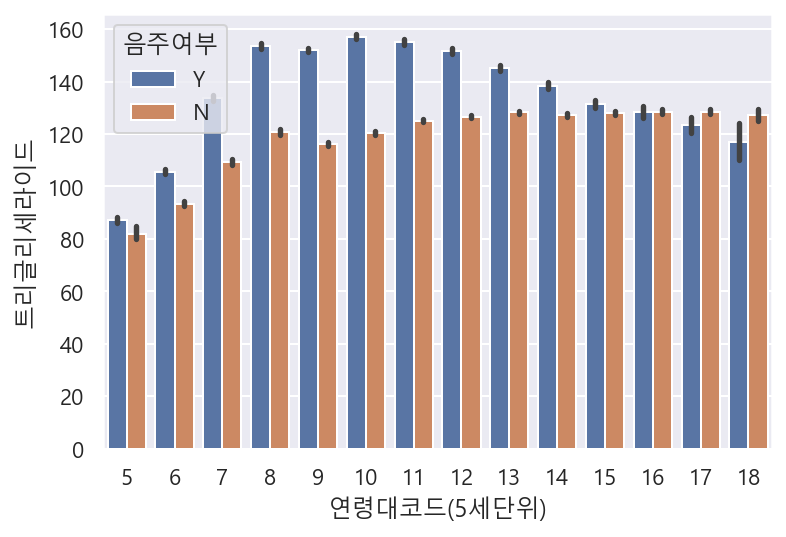

In [385]:
# 트리글리세라이드(중성지방)에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그리기
# 검은색 막대는 신뢰구간을 의미함
# ci (confidence interval)을 지정해 줄 수 있음
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부")

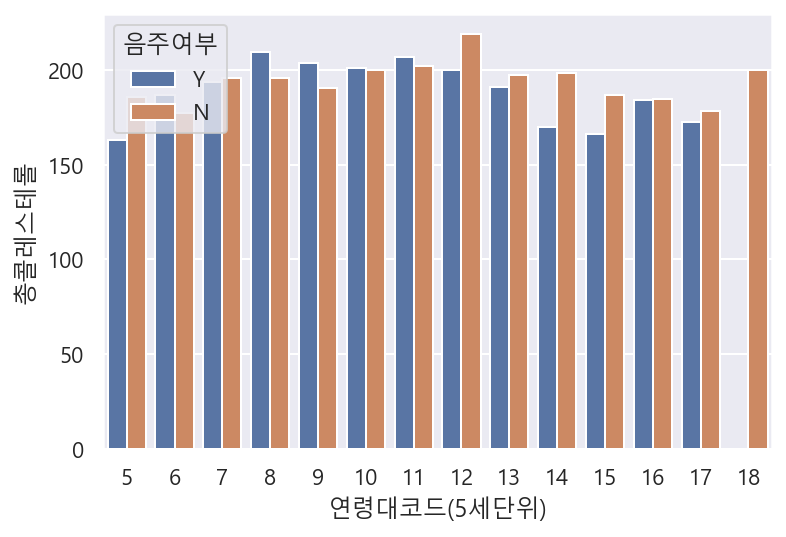

In [386]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부", ci=None)

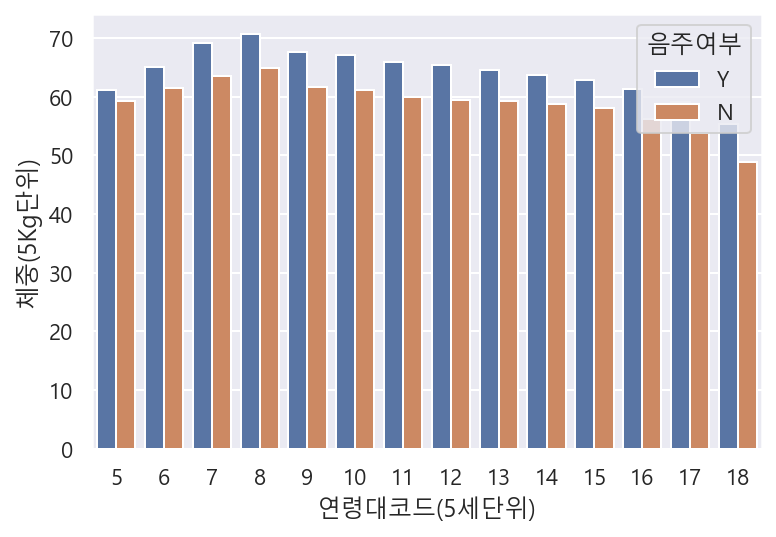

In [387]:
# 연령대코드와 체중(5Kg 단위)을 성별에 따라 보기
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부", ci=None)

## lineplot and pointplot

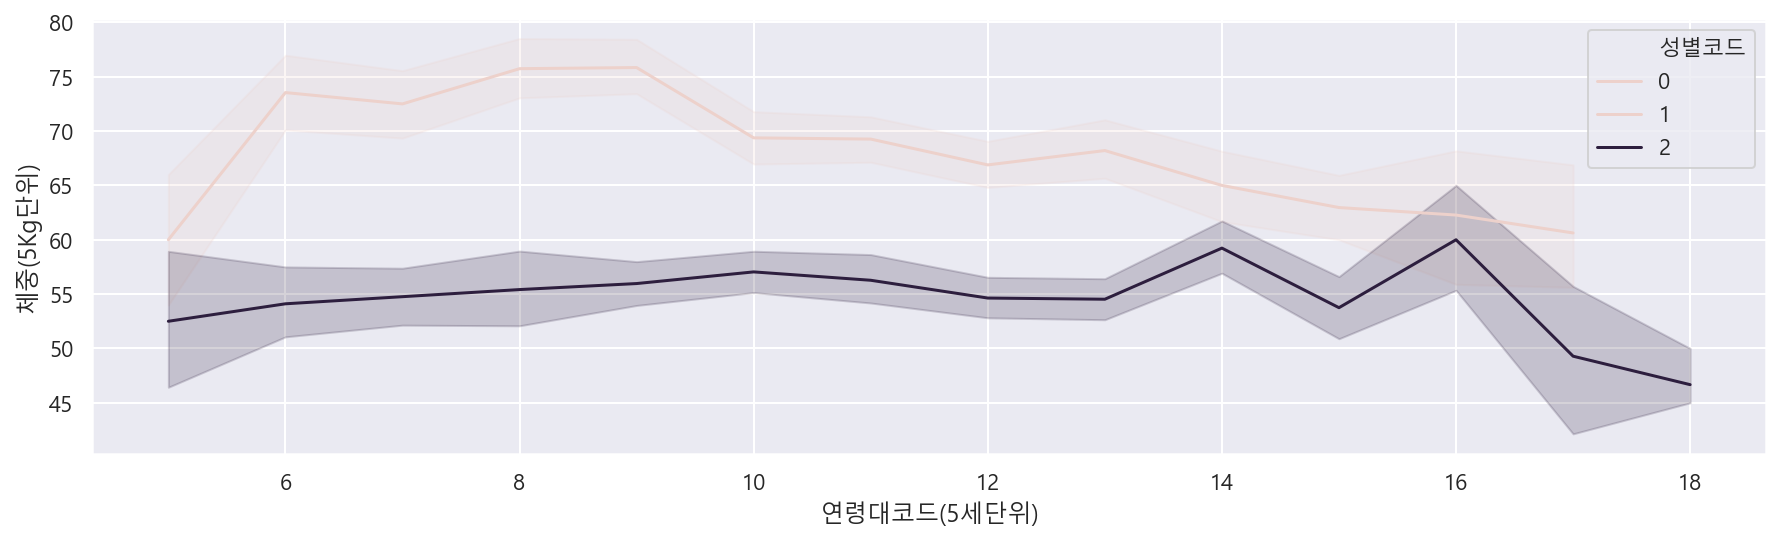

In [388]:
# 연령대코드(5세 단위)에 따른 체중(5Kg 단위)을 성별코드에 따라 lineplot그리기
# 샘플로 그리면 신뢰구간이 그림자로 표시됨
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드")

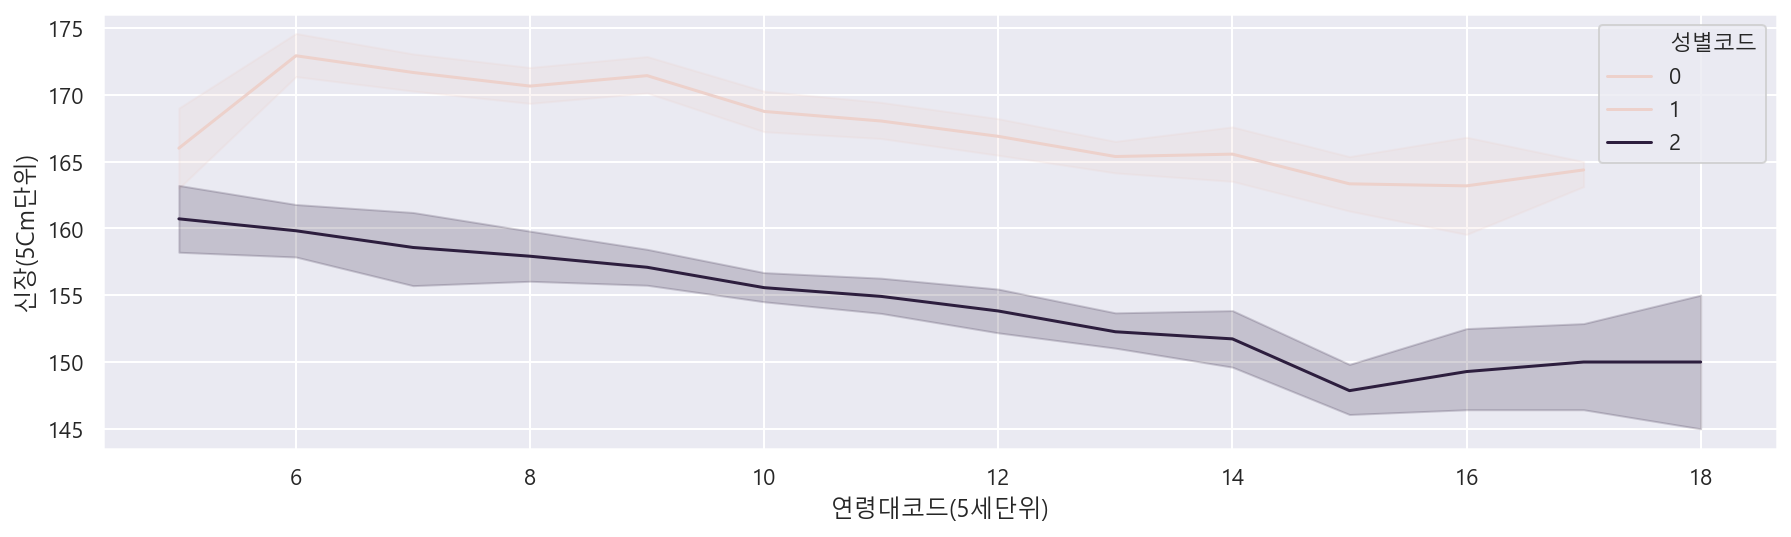

In [389]:
# 연령대코드(5세단위)에 따른 신장(5Cm단위)을 성별코드에 따라 lineplot 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드")

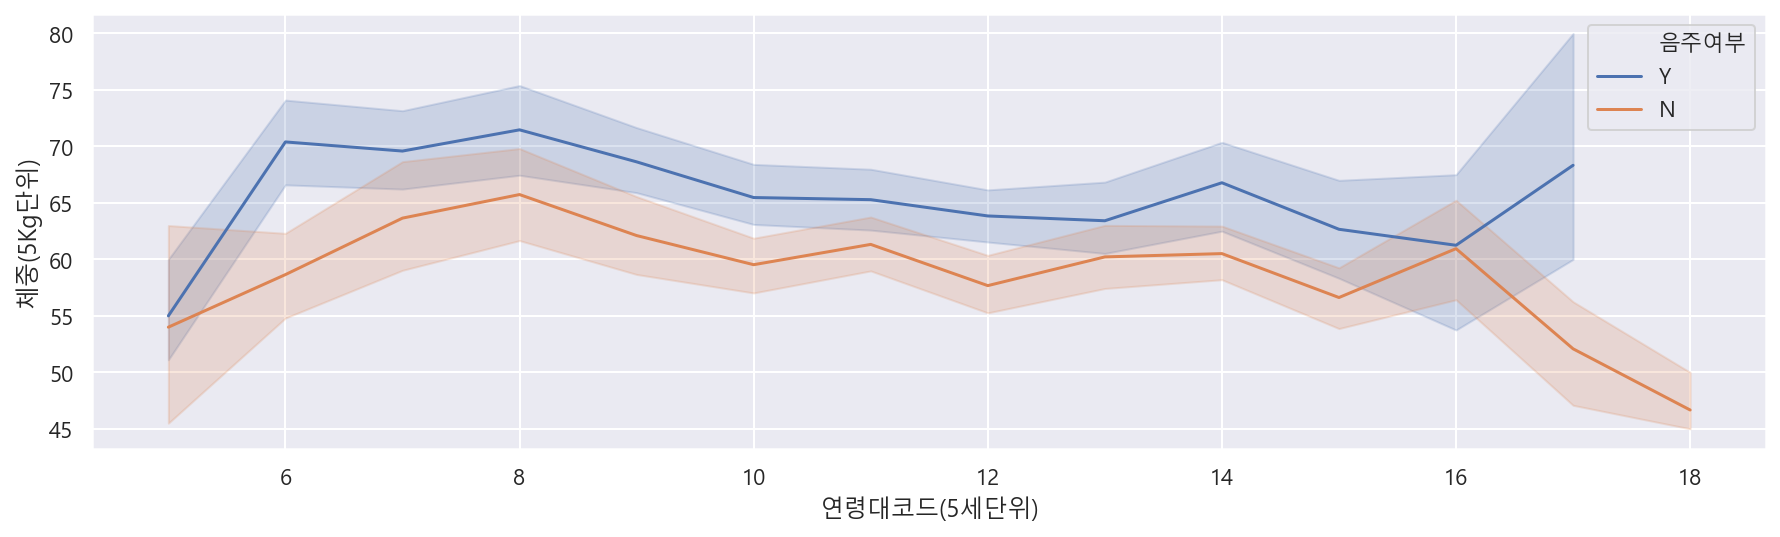

In [390]:
# 연령대코드(5세단위)에 따른 채중(5Kg단위)을 음주여부에 따라 point plot과 barplot 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부")

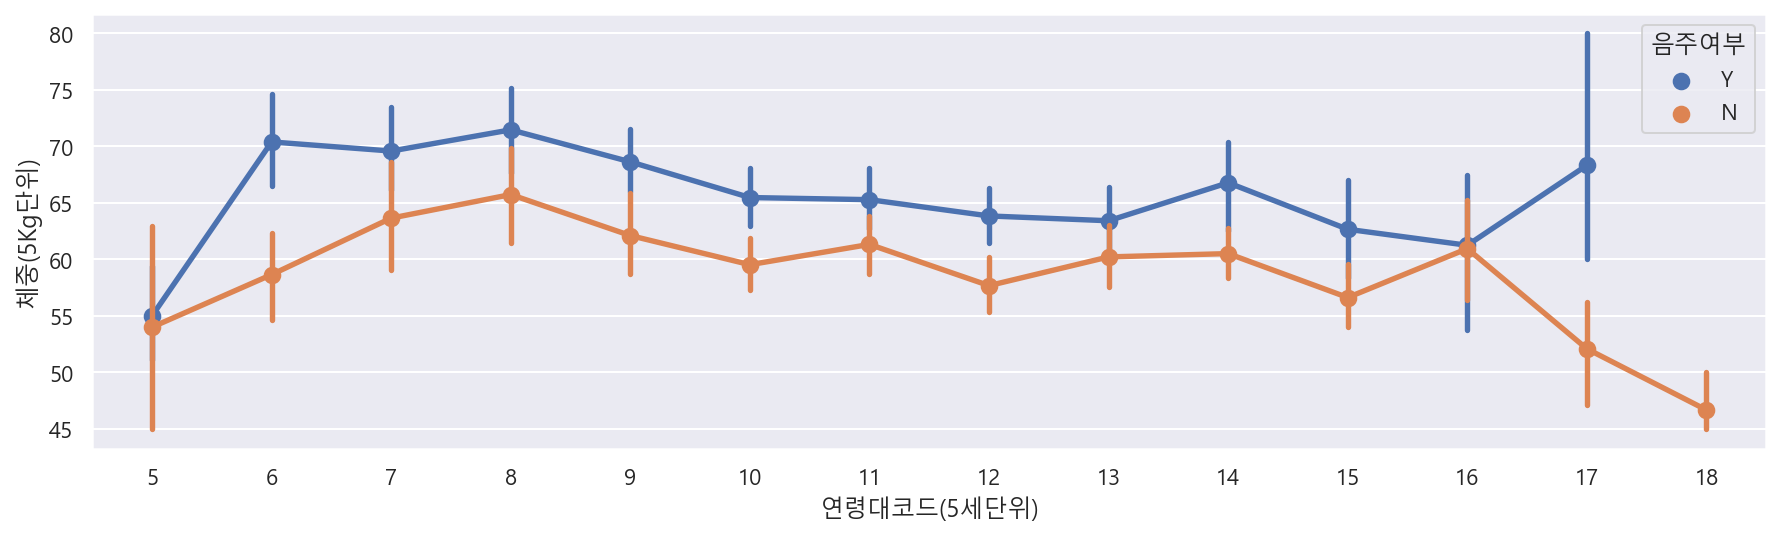

In [391]:
# point plot은 신뢰구간이 막대로 표현됨
plt.figure(figsize=(15,4))
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부")

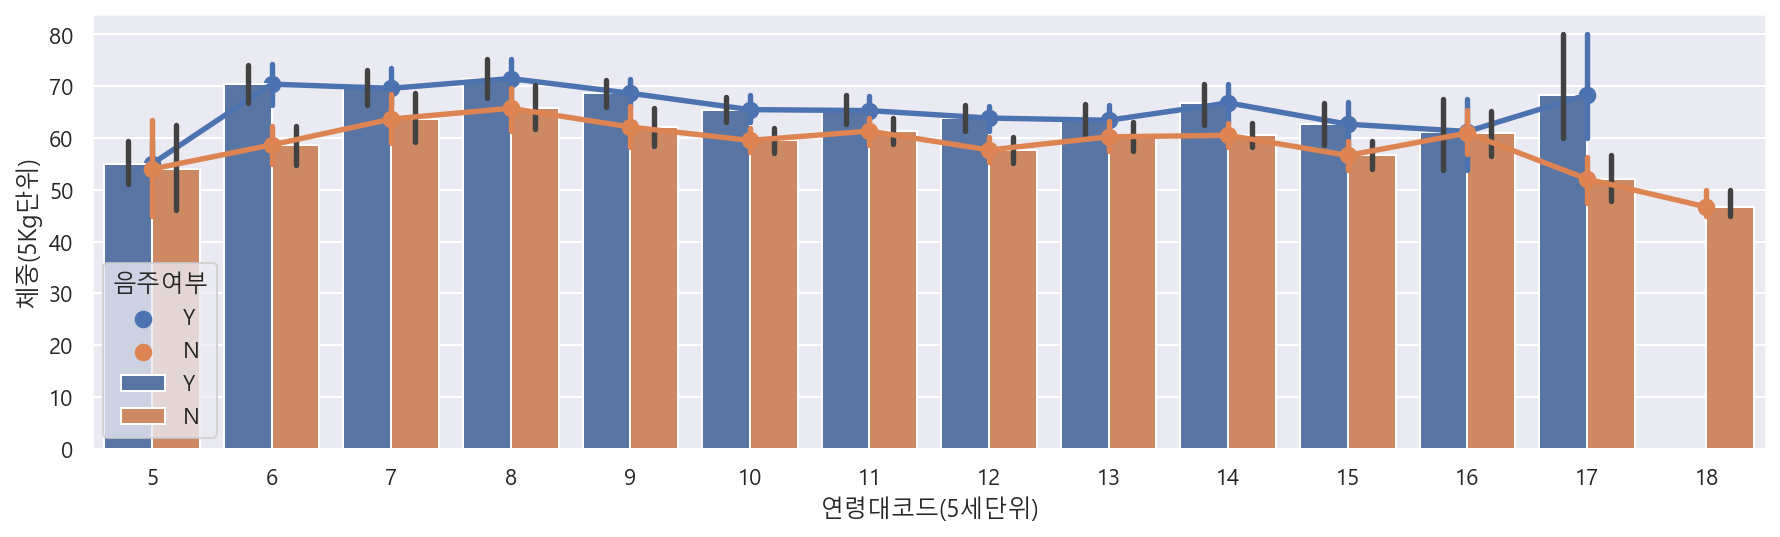

In [392]:
# pointplot과 barplot은 겹쳐서 그리기 가능
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부")
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부")

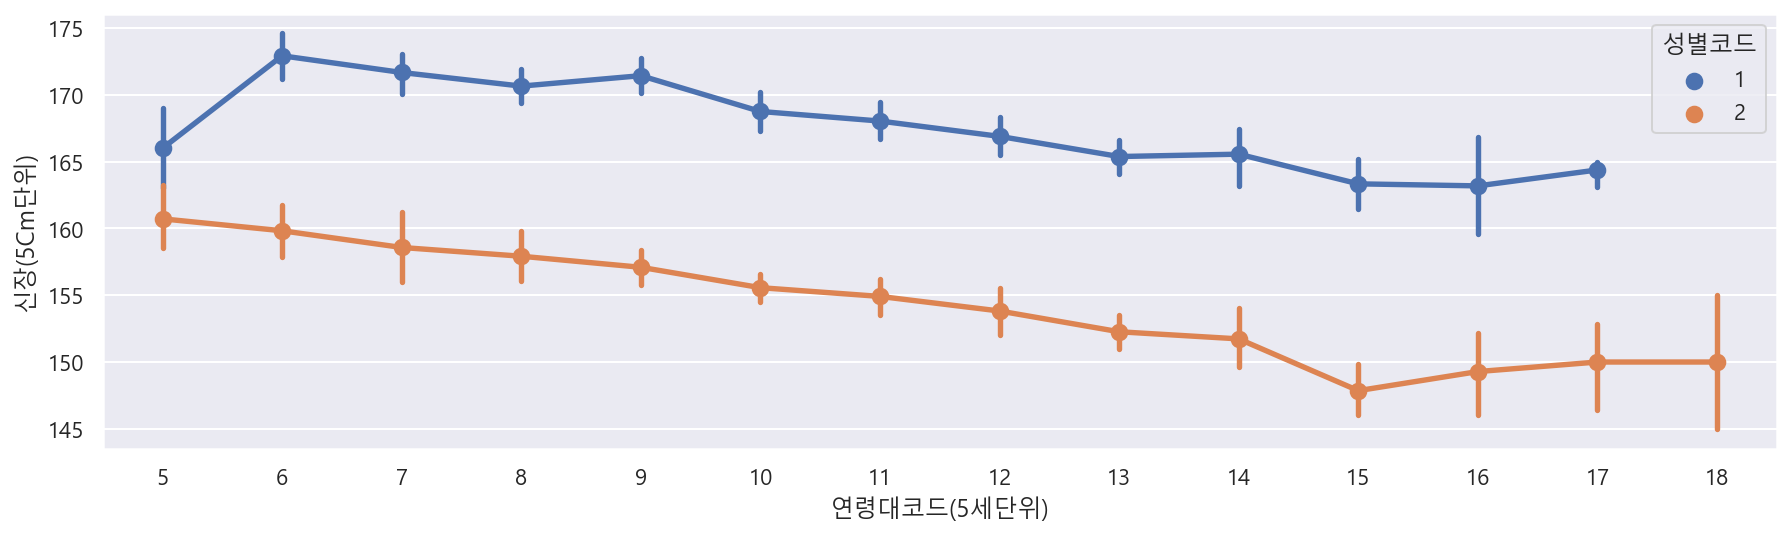

In [393]:
# 연령대코드(5세단위)에 따른 신장(5Cm단위)을 성별코드에 따라 pointplot으로 그리기
plt.figure(figsize=(15,4))
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드")

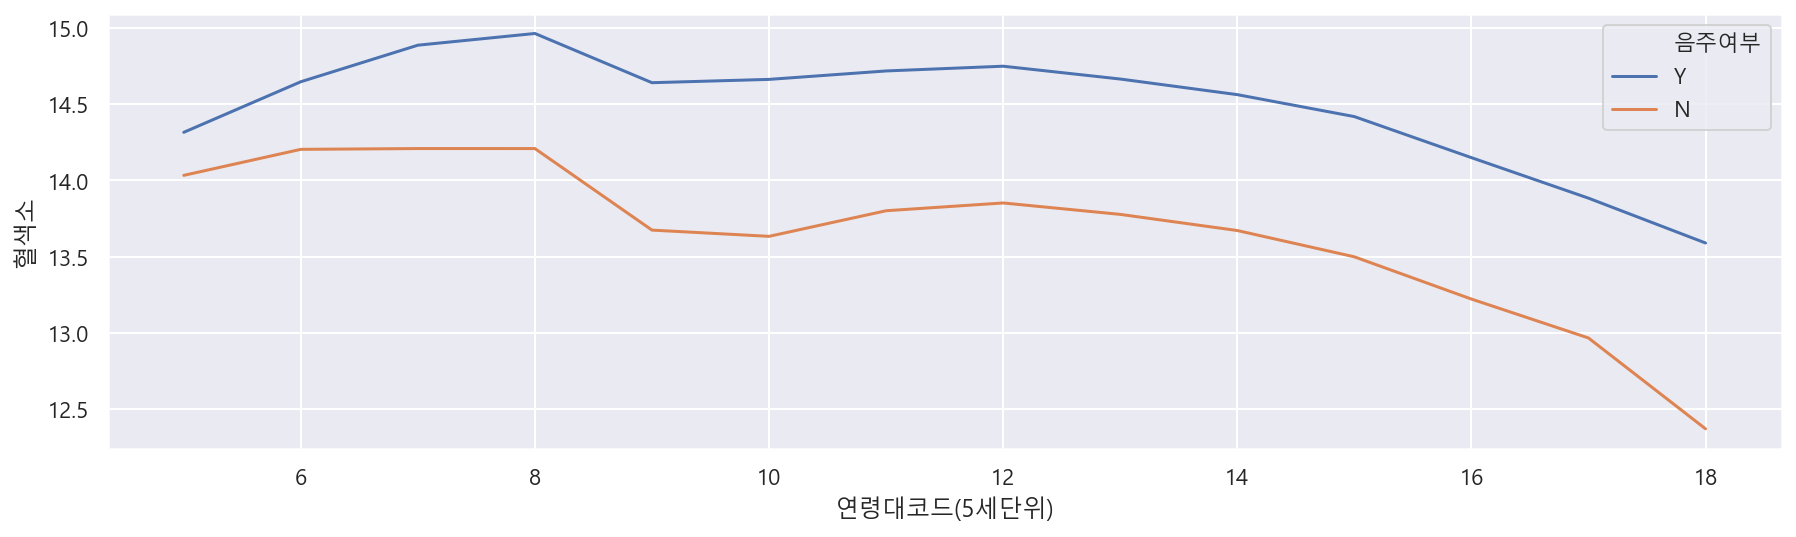

In [394]:
# 연령대코드(5세단위)에 따른 혈색소를 음주여부에 따라 lineplot으로 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

## boxplot
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아닌, 자료로부터 얻은 통계량 5가지 요약 수치로 그림
* 5가지 요약 수치랑 기술통계학에서 자료의 정보를 알려주는 다섯 가지 수치
1. 최솟값
2. 제 1사분위수
3. 제 2사분위수 = 중앙값
4. 제 3사분위수
5. 최댓값

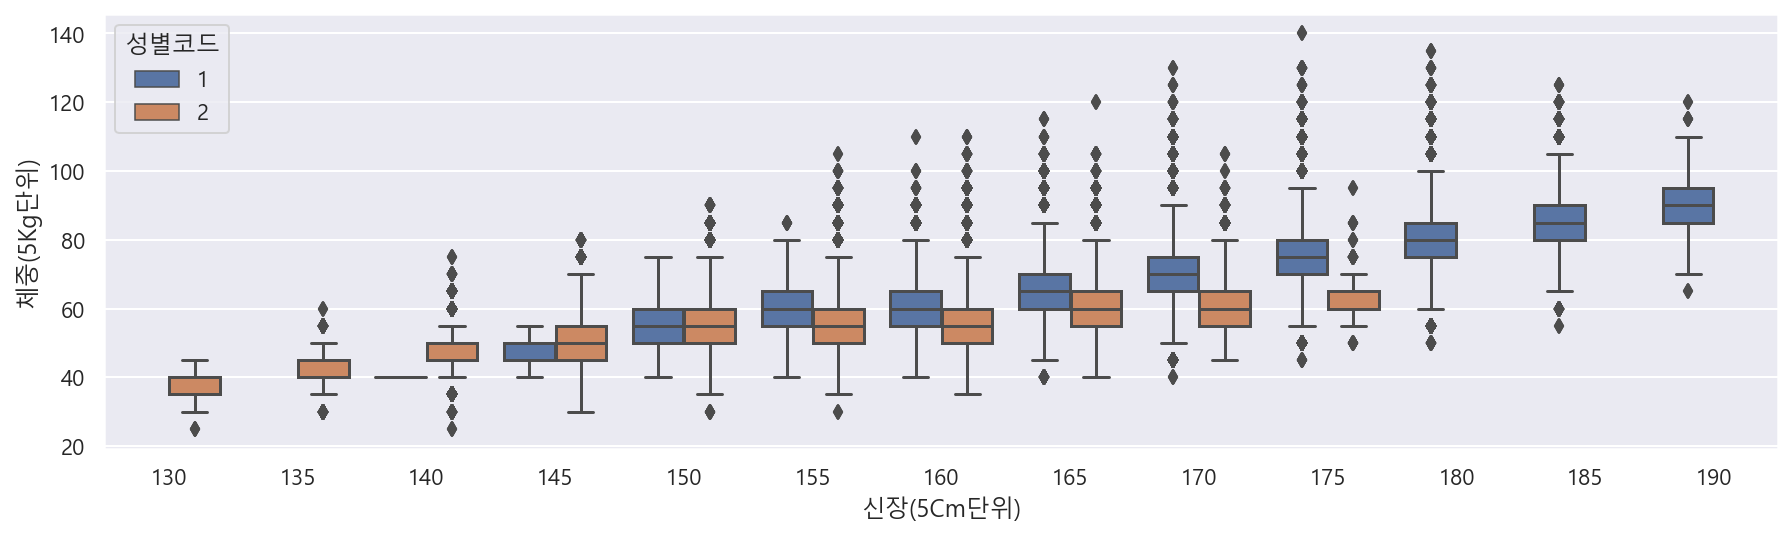

In [395]:
# boxplot으로 신장(5Cm 단위)에 따른 체중(5Kg 단위)을 그리며, 성별코드에 따라 다른 색상으로 표현
# 다이아몬드 표시는 이상치를 의미
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드")

## violin plot

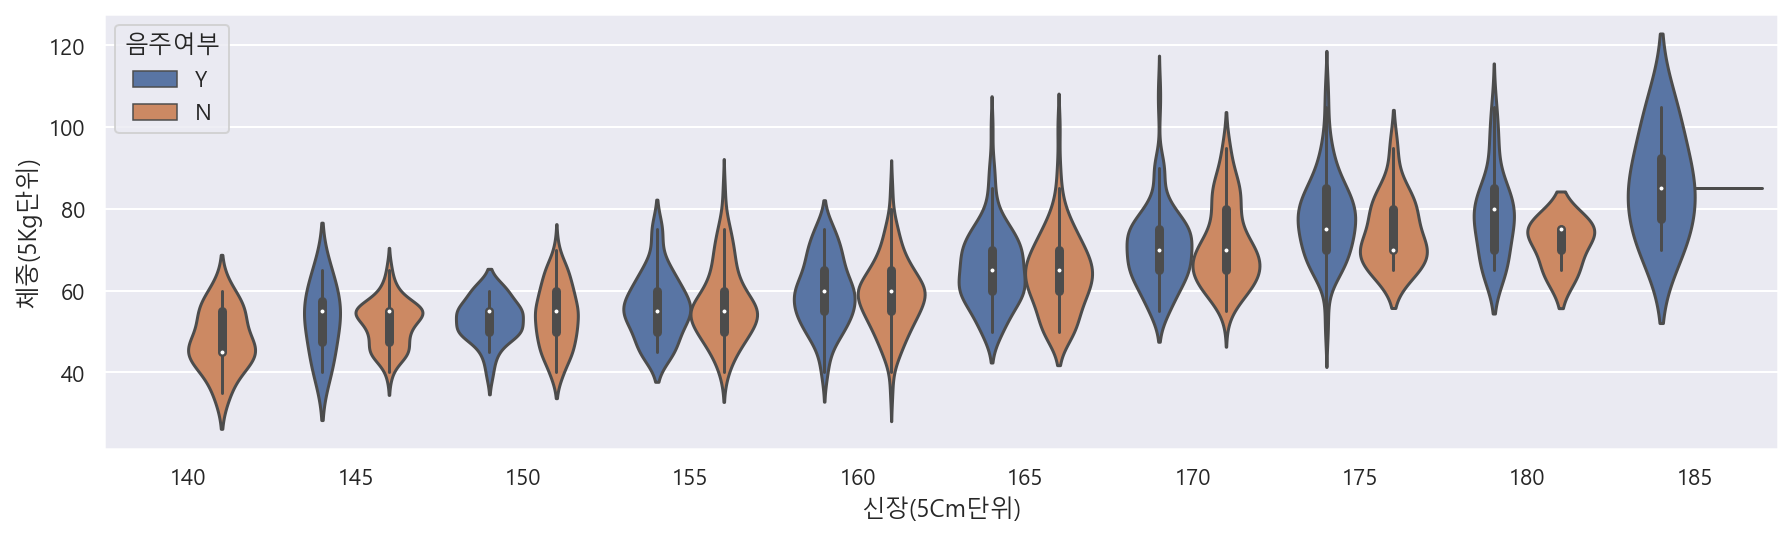

In [396]:
# violinplot 신장(5Cm단위)에 따른 체중(5Kg 단위)을 그리며, 음주여부에 따라 다른 색상으로 표현
# 네모난 상자 안에 분포도 보여준다는 것이 장점
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

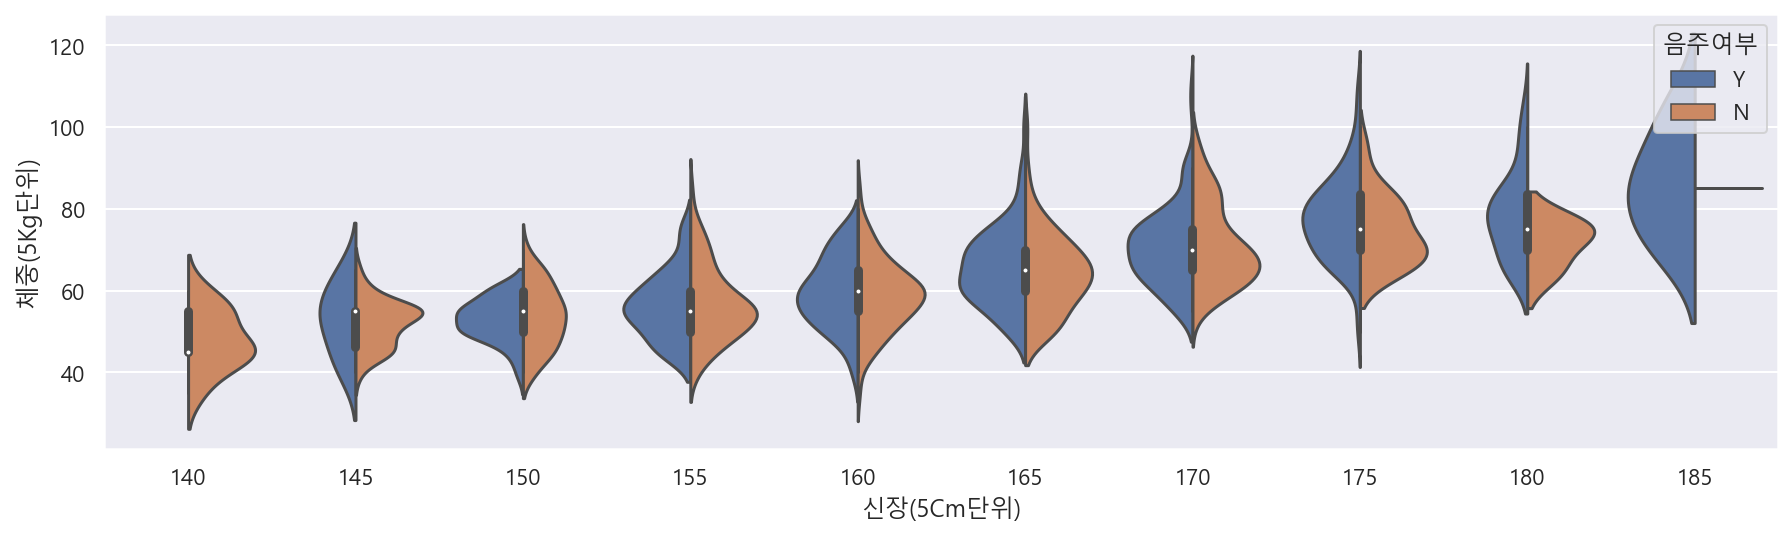

In [397]:
# violinplot의 split 기능 사용
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부", split=True)

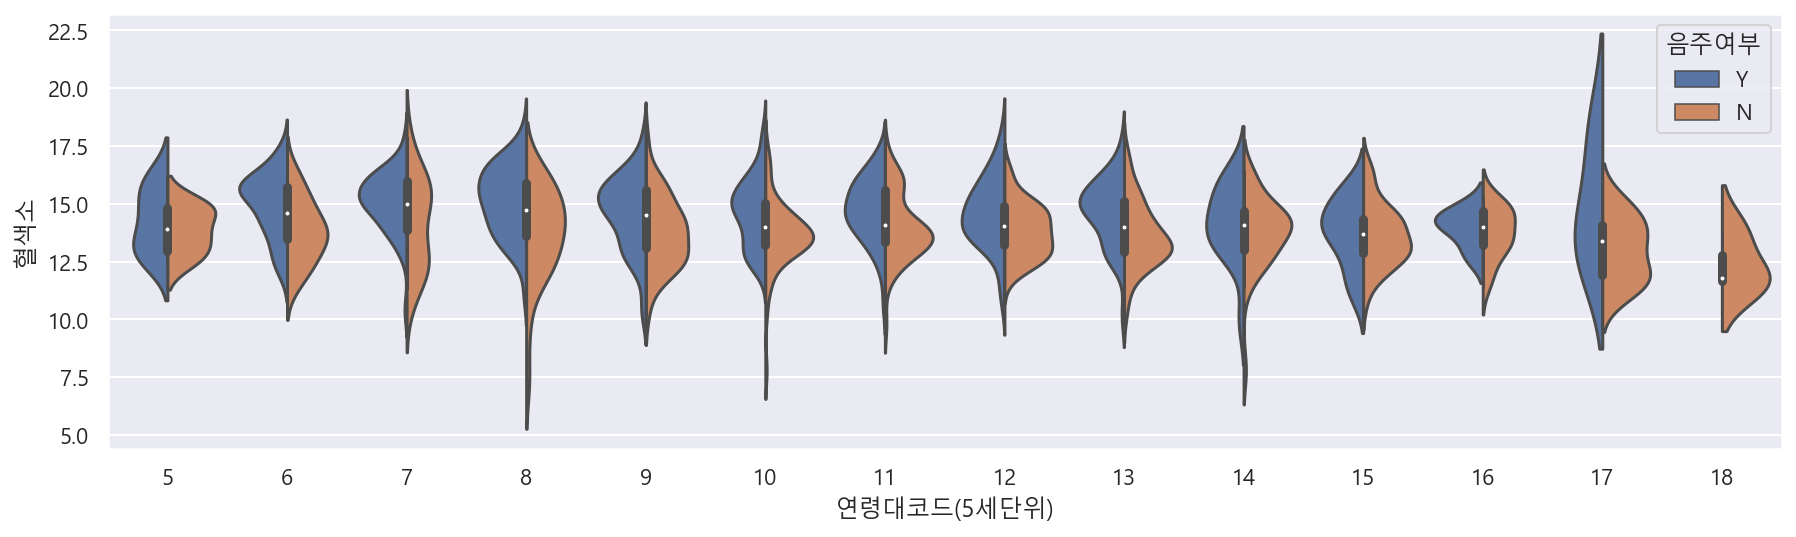

In [398]:
# violinplot 연령대코드(5세단위)에 다른 혈색소 그리기, 음주여부에 따라 다른 색상
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)

## swarm plot
* 범주형 데이터를 산점도로 시각화

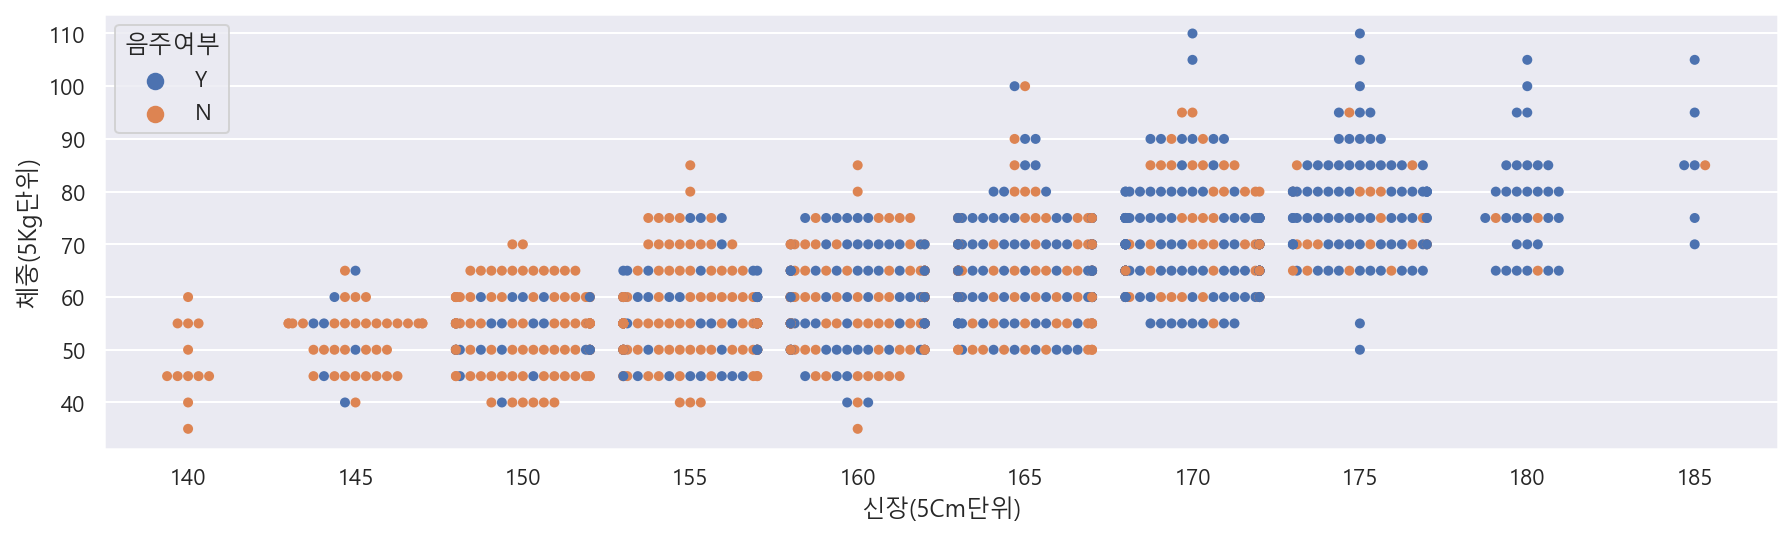

In [399]:
# swarmplot으로 신장(5Cm단위)에 따른 체중(5Kg단위) 그리기, 음주여부에 따른 색상 표현
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 샘플먼저 돌려보기
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

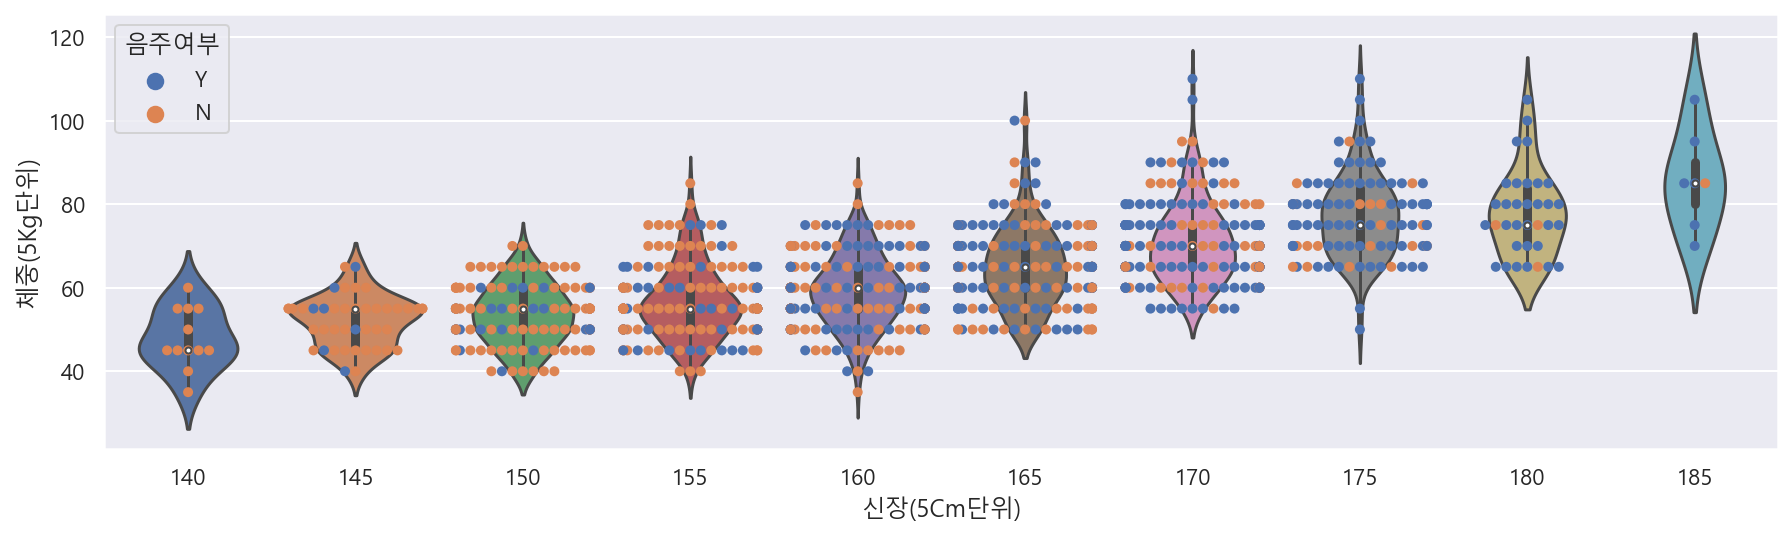

In [400]:
# violinplot과 같이 그리기 가능
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


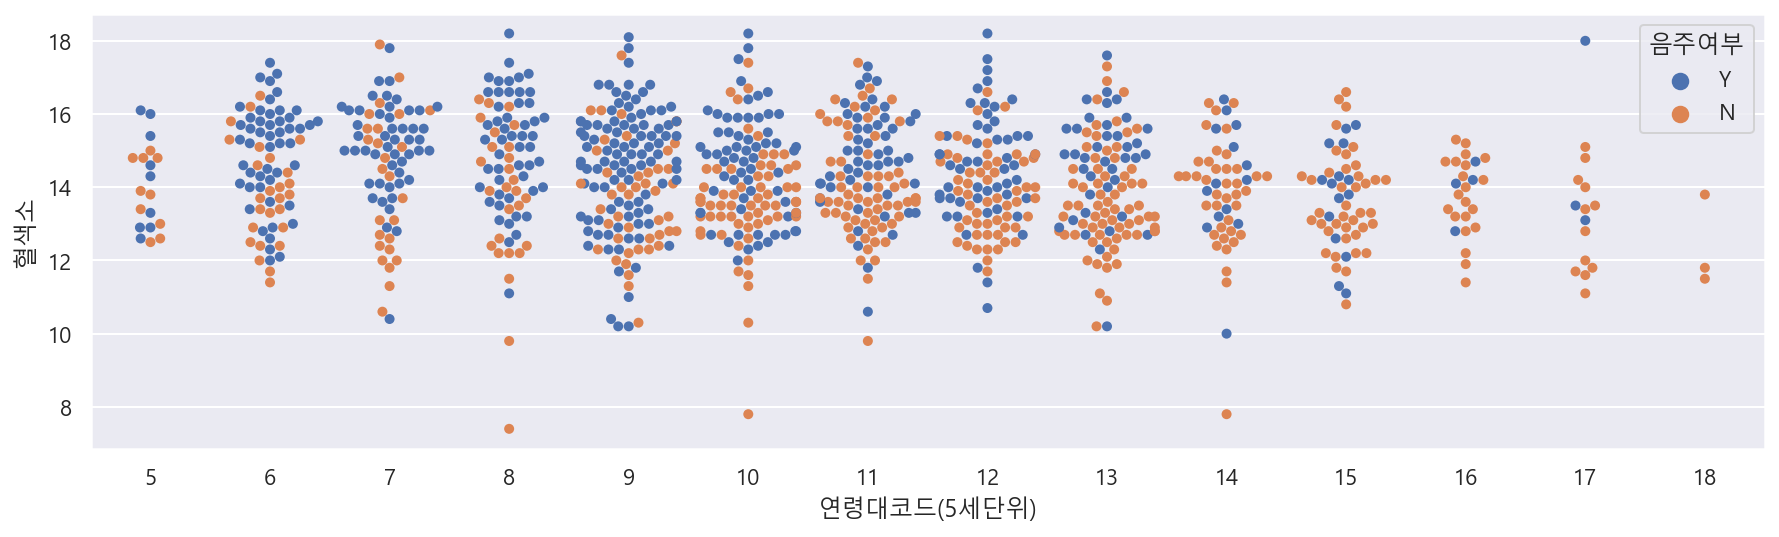

In [401]:
# swarmplot으로 연령대코드(5세단위)에 따른 음주여부 그리기, 성별코드에 따라 생상 표기
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

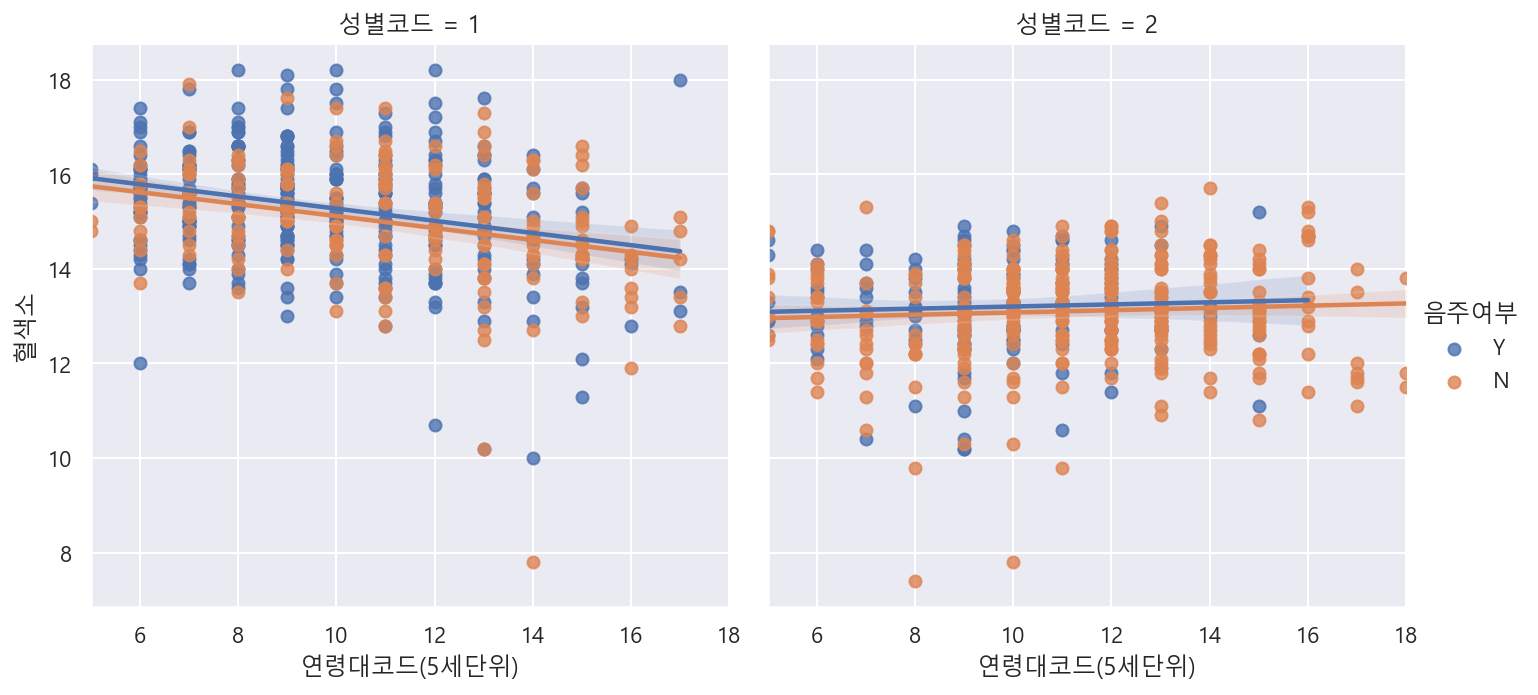

In [402]:
# lmplot으로 그리기
# lmplot은 회귀선을 그려줌
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")

# 수치형 데이터 시각화

## scatterplot - 산점도
* 수치형 vs 수치형 데이터의 상관 관계를 볼 때 주로 사용
* 점의 크기를 데이터의 수치에 따라서 다르게 보기

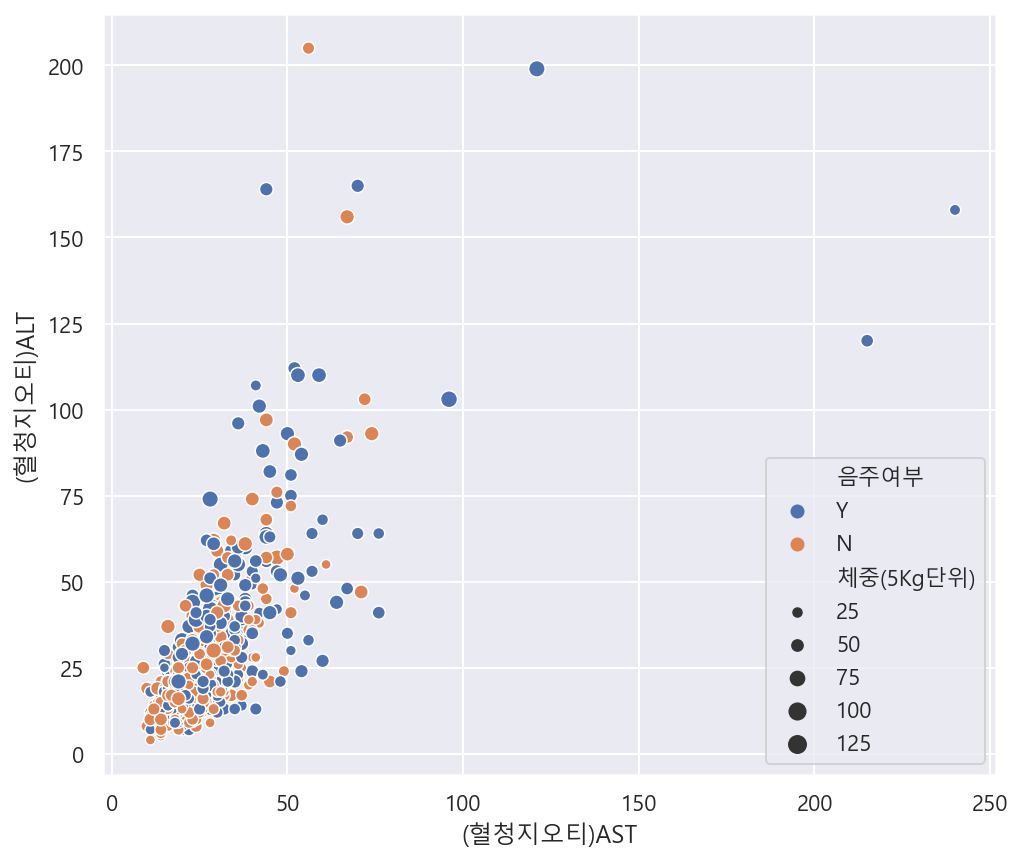

In [403]:
# scatterplot으로 "(혈청지오티)AST", "(혈청지오티)ALT"을 그리고 음주여부에 따라 색상 표기
# 이상치 표기에 적합
plt.figure(figsize=(8,7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부",
               size="체중(5Kg단위)")

## lmplot - 상관 관계를 보기

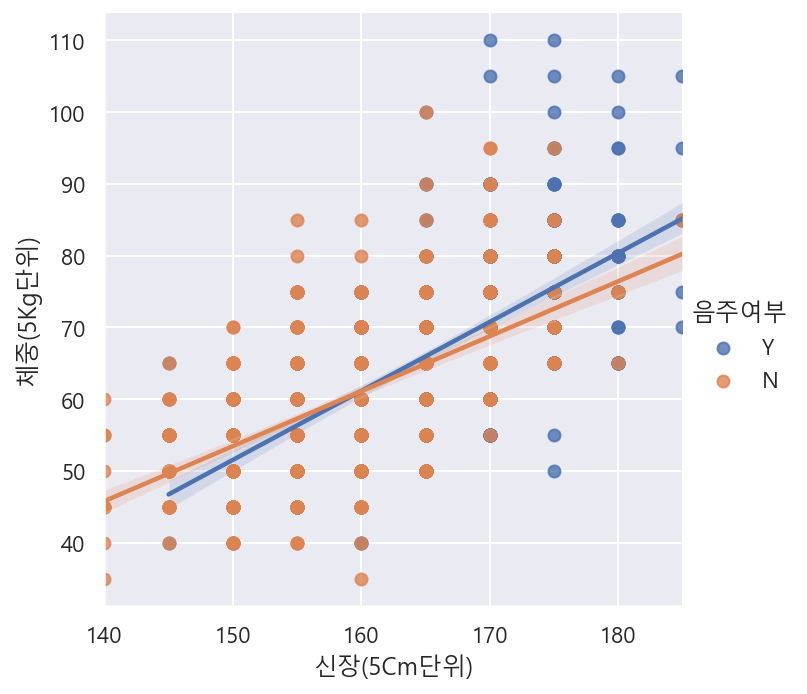

In [404]:
# lmplot으로 신장(5Cm단위)에 따른 체중(5Kg단위)을 그리며, 음주여부에 따라 다른 색상 표현
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

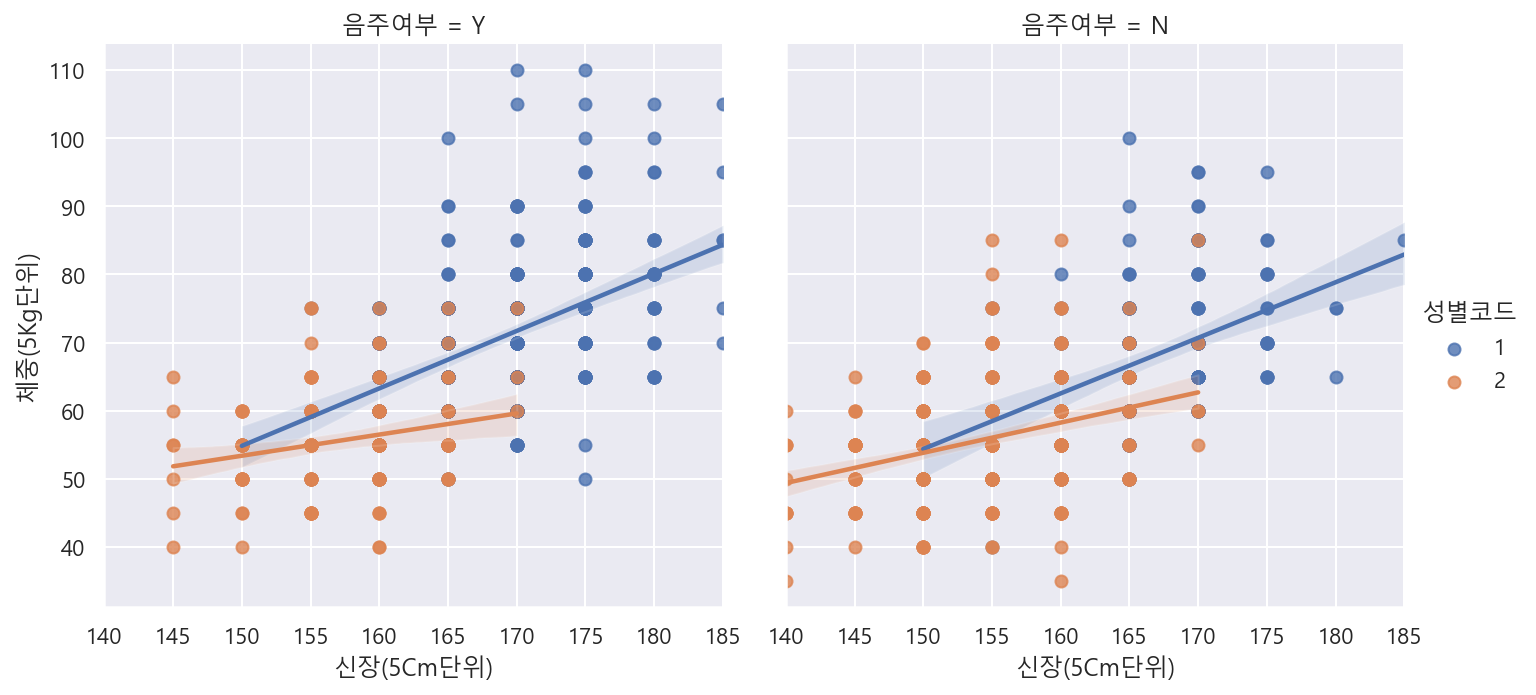

In [405]:
# lmplot의 col기능을 통해 음주여부에 따라 서브플롯 그리기
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드", col="음주여부")

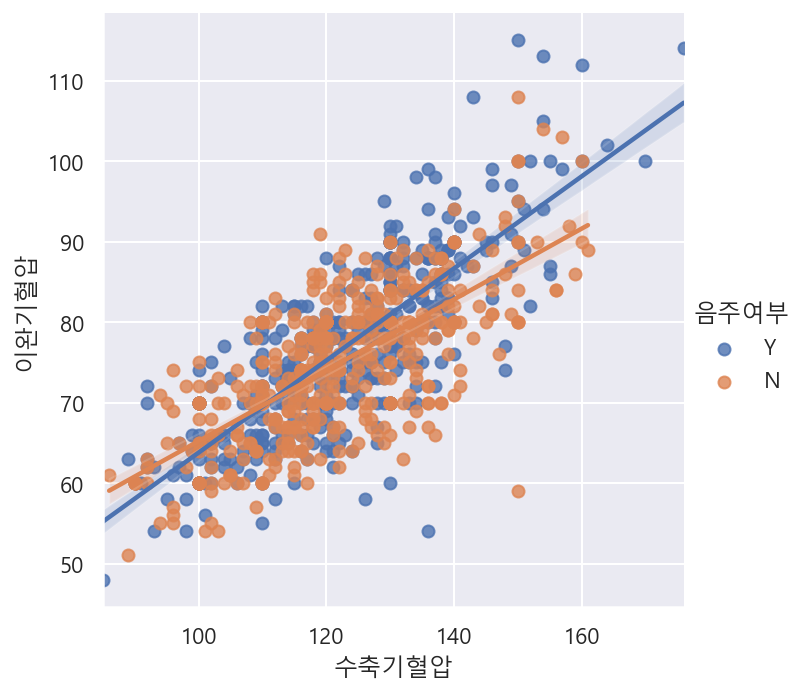

In [406]:
# lmplot으로 수축기, 이완기 혈압을 그리고 음주여부에 따라 색상 표현
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="음주여부")

AST와 ALT
<br>
AST와 ALT는 간세포에 들어있는 효소
<br><br>
간이 손상되어 간세포가 파괴되면 그 안에 있던 AST와 ALT가 빠져 나와 혈액 속에 섞임.
따라서 간이 손상되면 AST와 ALT수치가 높아진다.
<br><br>
정상 수치는 병원에 따라 기준치가 다소 차이 존재, AST는 5에서 35 IU/L, ALT는 5에서 40 IU/L 정도
<br><br>
간혹 전날 음주를 하거나 몸이 피곤하면일시적으로 정상치를 웃돌 수 있어서 딱 한 번의 감사만으로 
간질환 여부를 판단하는 경우는 드물다. 하지마 일차적으로 간의 상태를 파악하는데 아주 중요한 기준

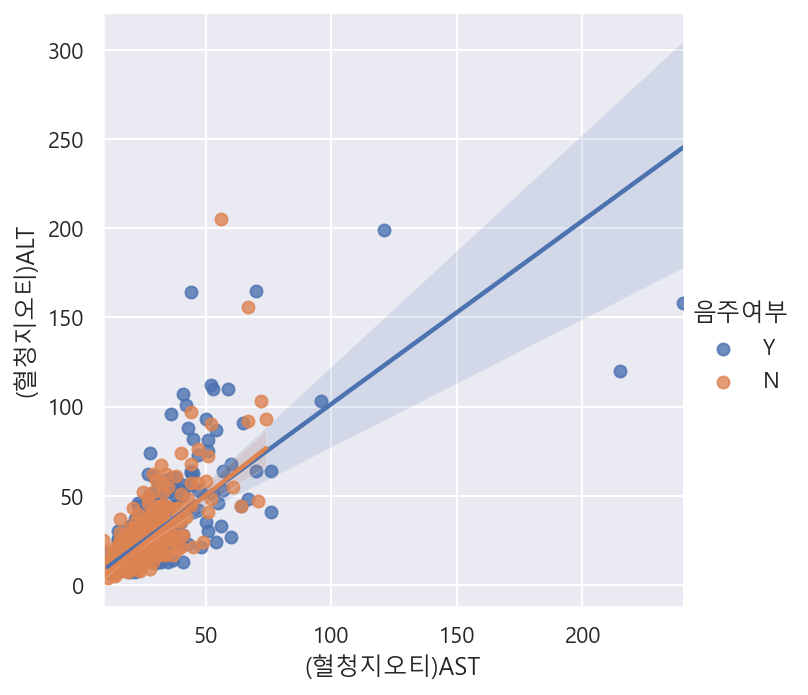

In [407]:
# lmplot으로 "AST", "ALT"을 그리고 음주여부에 따른 색상 표현
# robust로 이상치 제거 가능
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", robust=True)

## 이상치 다루기
* 이상치가 있으면 데이터가 자세히 보이지 않거나 이상치로 인해 회귀선이 달라지기도 함
* 시각화를 통해 찾은 이상치를 제거하고 보거나 이상치만 따로 모아보기

In [408]:
# "(혈청지오티)AST"와 "(혈청지오티)ALT"가 400 이하인 값만 데이터 프레임 형태로 추출
# df_ASLT 라는 변수 담기
df_ASLT = df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]

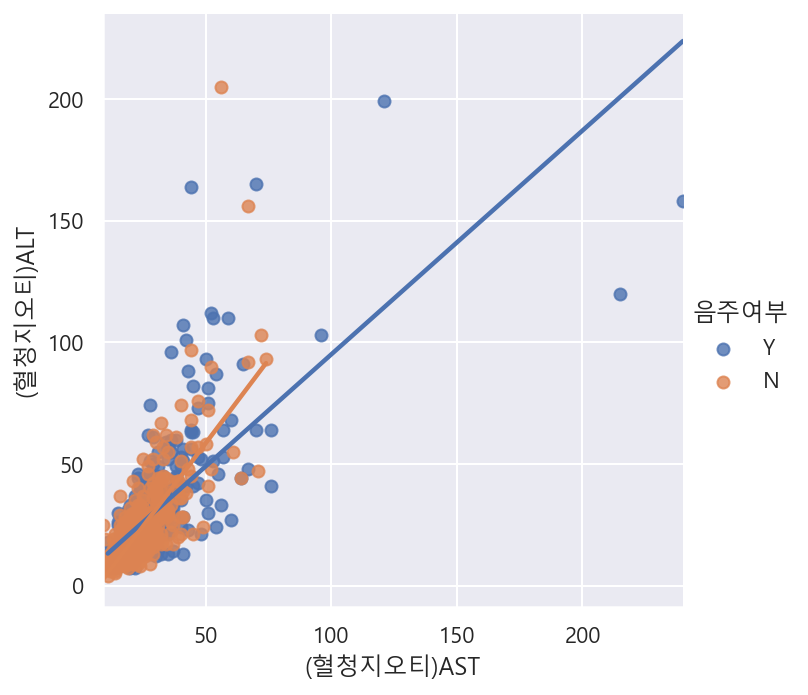

In [409]:
# 이상치를 제거한 "(혈청지오티)AST"와 "(혈청지오티)ALT"를 lmplot으로 그리기
# 음주여부에 따라 다른 색 표현
sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)


In [410]:
# "(혈청지오티)AST"와 "(혈청지오티)ALT"가 400 이상인 값만 데이터 프레임 형태로 추출
# df_ASLT_high 라는 변수 담기
df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) &
                         (df["(혈청지오티)ALT"] > 400)]

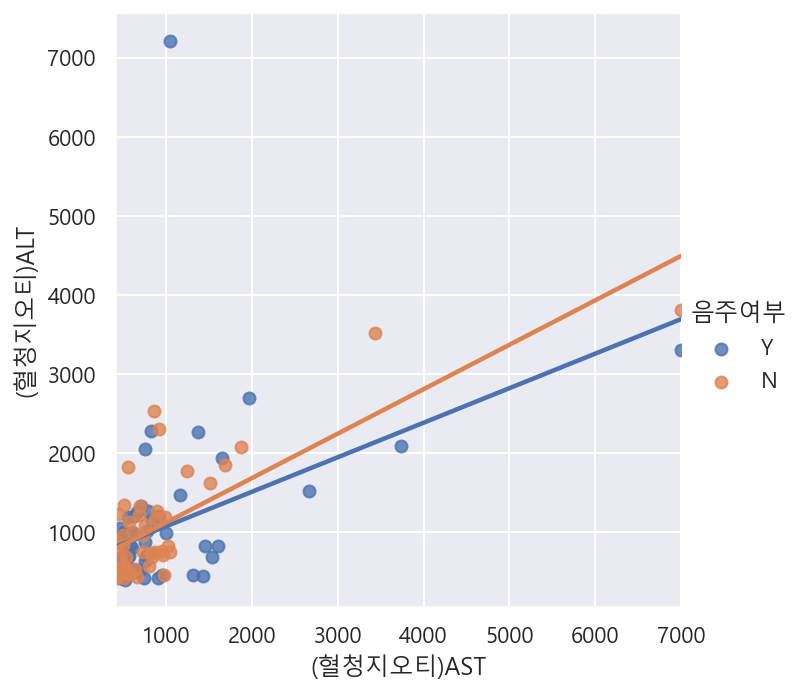

In [411]:
# df_ASLT_high 데이터 프레임에 담긴 혈청 지오티가 높은 데이터만 다로 보기
sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [412]:
df_ASLT_high_6000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 6000]
df_ASLT_high_6000.iloc[:, 10:27]

청력(좌)  청력(우)  수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  HDL콜레스테롤  \
648479    1.0    1.0  160.0  100.0        95.0   201.0     362.0      66.0   
811481    1.0    1.0  100.0   90.0       137.0   129.0     120.0      53.0   

        LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  흡연상태 음주여부  
648479      62.0  15.7  4.0      1.3      7000.0      3307.0  280.0   2.0    Y  
811481      52.0  15.9  4.0      2.2      7000.0      3807.0  429.0   1.0    N

## distplot
* 위키백과에서 히스토그램과 확률 밀도 함수 정의 참고

In [413]:
# 수치형 데이터로 된 컬럼을 찾기 위해 컬럼명만 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [414]:
# "총콜레스테롤"에 따른 distplot
# 결측치가 있으면 distplot은 그려내지 못한다.
# 결측치부터 확인하기
df_chol = df[df["총콜레스테롤"].notnull()]

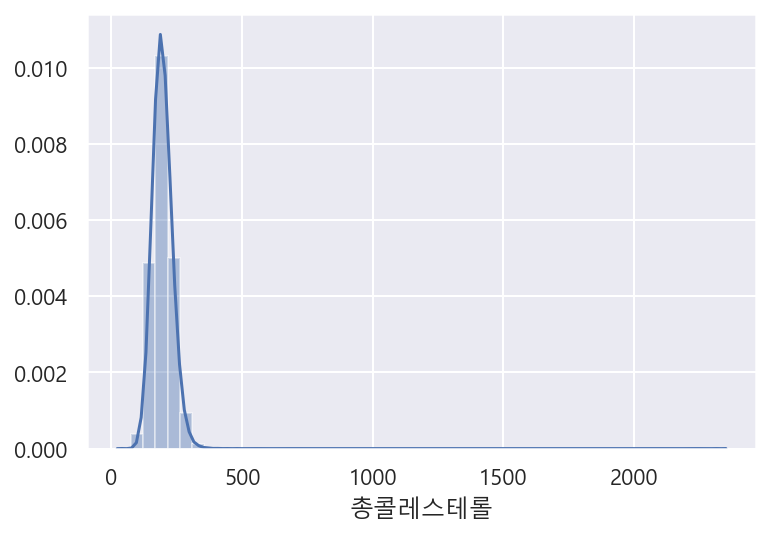

In [415]:
sns.distplot(df_chol["총콜레스테롤"])

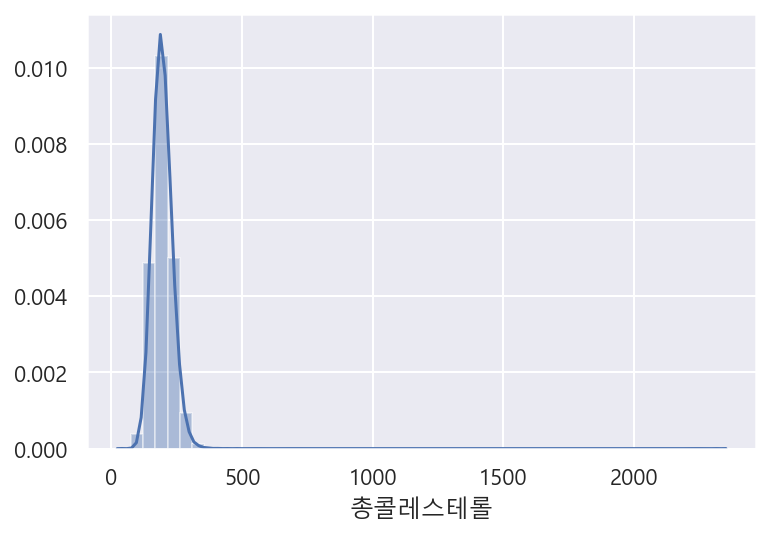

In [416]:
# bins옵션을 통해서 바꿀 수 있음
sns.distplot(df_chol["총콜레스테롤"], bins=50)

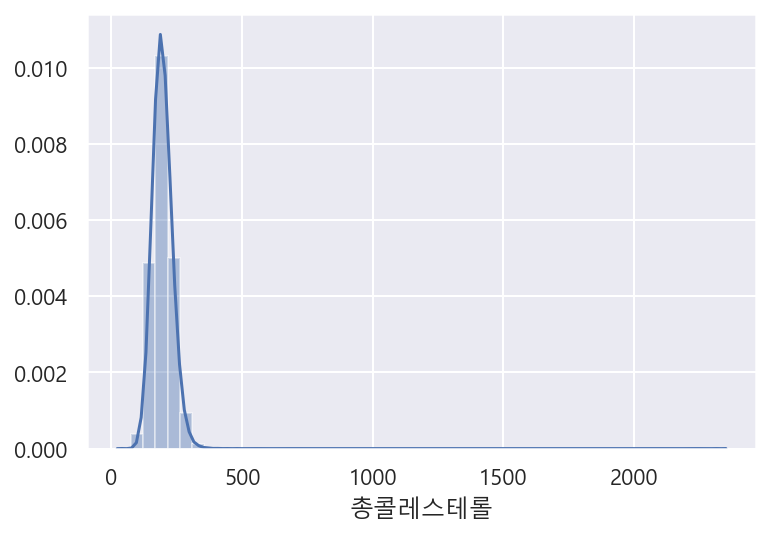

In [417]:
# 만약 sns.distplot(df_chol)을 하려면
# df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]
# distplot은 왜도와 첨도도 파악 가능
# 오른쪽에 이상치가 있다는 것을 파악 가능
df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]
sns.distplot(df_chol)

In [418]:
df_chol.describe()
# max값이 지나치게 큰 값이 있다는 것을 파악 가능

count    999957.000000
mean        195.548251
std          38.718205
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: 총콜레스테롤, dtype: float64

In [419]:
df_chol

0         193.0
1         228.0
2         136.0
3         201.0
4         199.0
          ...  
999995    198.0
999996    133.0
999997    205.0
999998    122.0
999999    225.0
Name: 총콜레스테롤, Length: 999957, dtype: float64

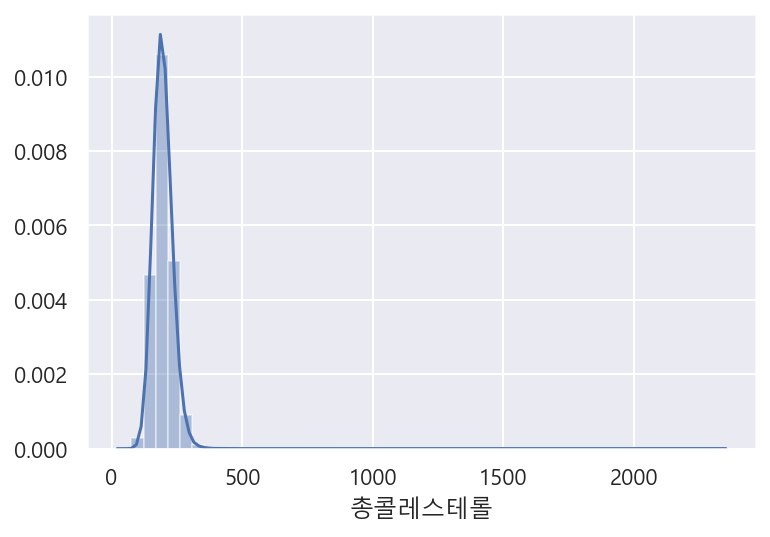

In [420]:
# 음주여부가 1인 값에 대한 "총콜레스테롤"을 displot
# 우선연산자 주의해서 사용할 것
sns.distplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == "Y"),
    "총콜레스테롤"])

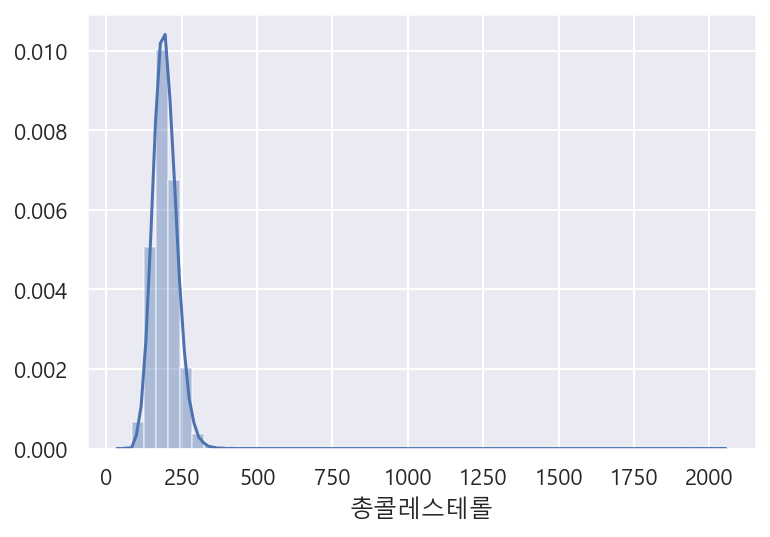

In [421]:
# 음주여부가 0인 값에 대한 "총콜레스테롤"을 distplot 으로 그리기
sns.distplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == "N"),
    "총콜레스테롤"])

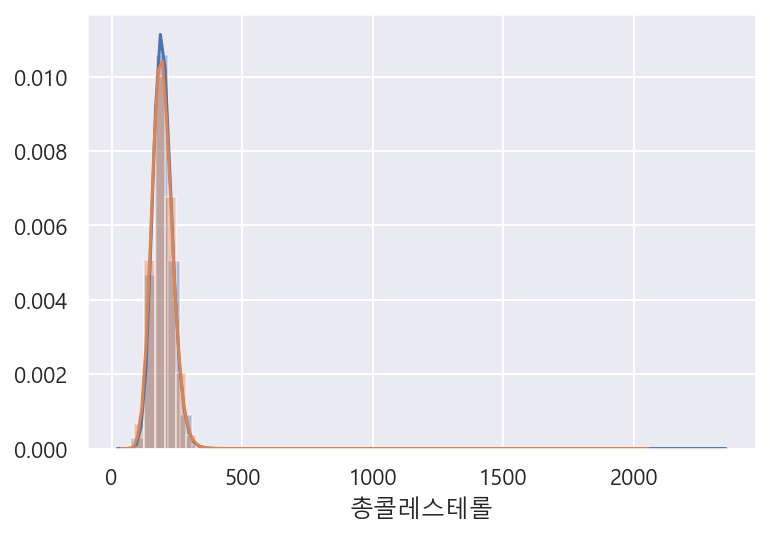

In [422]:
# 음주여부 값에 대한 "총콜레스테롤"을 distplot으로 그리며, 하나의 그래프로 표시
sns.distplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == "Y"),
    "총콜레스테롤"])
sns.distplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == "N"),
    "총콜레스테롤"])
# kdeplot이나 hist=false로 막대그래프를 뺄 수 있음.

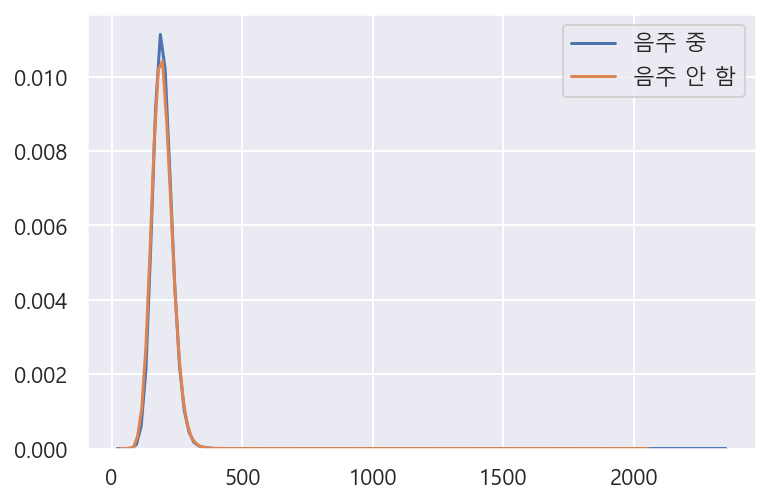

In [423]:
sns.kdeplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == "Y"),
    "총콜레스테롤"], label="음주 중")
sns.kdeplot(df.loc[
    df["총콜레스테롤"].notnull() & (df["음주여부"] == "N"),
    "총콜레스테롤"], label="음주 안 함")

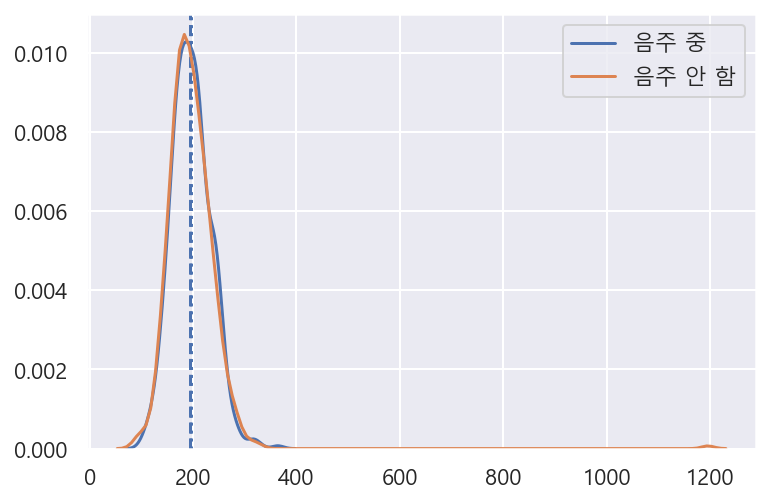

In [424]:
# 샘플데이터로 보기
# 요 샘플은 이상치가 섞여서 좀 안좋음
# 평균이나 중앙값 표시 가능
plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle=":")
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df_sample.loc[
    df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == "Y"),
    "총콜레스테롤"], label="음주 중")
sns.kdeplot(df_sample.loc[
    df_sample["총콜레스테롤"].notnull() & (df["음주여부"] == "N"),
    "총콜레스테롤"], label="음주 안 함")

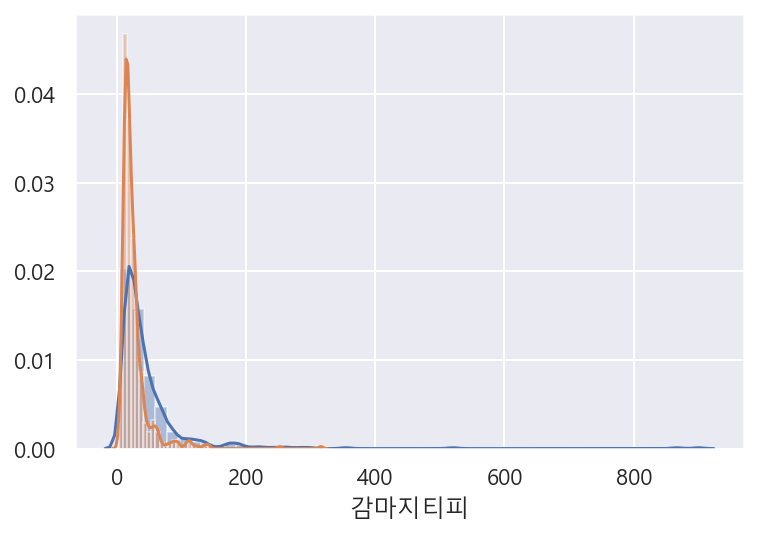

In [425]:
# 감마지티피 값에 따라 음주여부를 시각화
s_1 = df_sample.loc[df_sample["음주여부"] == "Y", "감마지티피"]
s_2 = df_sample.loc[df_sample["음주여부"] == "N", "감마지티피"]

sns.distplot(s_1, label="음주 중")
sns.distplot(s_2, label="음주 안 함")

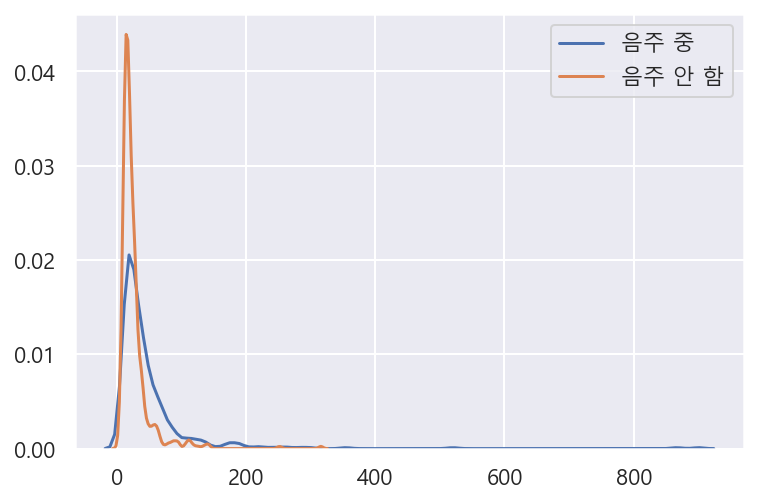

In [426]:
sns.kdeplot(s_1, label="음주 중")
sns.kdeplot(s_2, label="음주 안 함")

# 상관 분석
* 위키백과 상관분석 참조
<br>
r이 -1.0과 -0.7 사이라면, 강한 음의 선형관계,
<br>
r이 -0.7과 -0.3 사이라면, 뚜렷한 음의 선형관계,
<br>
r이 -0.3과 -0.1 사이라면, 거의 무시될 수 있는 음의 선형관계,
<br>
r이 +0.1과 +0.3 사이라면, 약한 양의 선형관계,
<br>
r이 +0.3과 +0.7 사이라면, 뚜렷한 양의 선형관계,
<br>
r이 +0.7과 +1.0 사이라면, 강한 음의 선형관계,

In [430]:
# 상관관계 계산을 위한 데이터 수정
df.loc[df["음주여부"] == "Y","음주여부"] = 1
df.loc[df["음주여부"] == "N","음주여부"] = 0
df_sample = df.sample(1000, random_state = 1)
df

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
0       2017        1     1            8    43        170         75  90.0   
1       2017        2     1            7    11        180         80  89.0   
2       2017        3     1            9    41        165         75  91.0   
3       2017        4     1           11    48        175         80  91.0   
4       2017        5     1           11    30        165         60  80.0   
...      ...      ...   ...          ...   ...        ...        ...   ...   
999995  2017   999996     1           10    48        175         80  92.1   
999996  2017   999997     1            8    41        170         75  86.0   
999997  2017   999998     2            9    26        155         50  68.0   
999998  2017   999999     1            6    29        175         60  72.0   
999999  2017  1000000     1           11    41        160         70  90.5   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
0         1.0    1.0  ...   40.0   1.0     1         Y      NaN    NaN   
1         0.9    1.2  ...   27.0   3.0     0         Y      NaN    NaN   
2         1.2    1.5  ...   68.0   1.0     0         N      NaN    NaN   
3         1.5    1.2  ...   18.0   1.0     0         Y      NaN    NaN   
4         1.0    1.2  ...   25.0   1.0     0         Y      NaN    NaN   
...       ...    ...  ...    ...   ...   ...       ...      ...    ...   
999995    1.5    1.5  ...   27.0   1.0     0         N      NaN    NaN   
999996    1.0    1.5  ...   15.0   1.0     0         N      NaN    NaN   
999997    1.0    0.7  ...   17.0   3.0     1         N      NaN    NaN   
999998    1.5    1.0  ...   17.0   1.0     0         N      NaN    NaN   
999999    1.0    1.5  ...   36.0   3.0     1         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
0           NaN           NaN    Y  2018-11-26  
1           NaN           NaN  NaN  2018-11-26  
2           NaN           NaN  NaN  2018-11-26  
3           NaN           NaN    N  2018-11-26  
4           NaN           NaN    N  2018-11-26  
...         ...           ...  ...         ...  
999995      NaN           NaN  NaN  2018-11-26  
999996      NaN           NaN  NaN  2018-11-26  
999997      NaN           NaN  NaN  2018-11-26  
999998      NaN           NaN  NaN  2018-11-26  
999999      NaN           NaN  NaN  2018-11-26  

[1000000 rows x 34 columns]

In [428]:
# 상관계수에 사용할 컬럼을 변수에 담기
columns = ['연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부']
columns

['연령대코드(5세단위)',
 '신장(5Cm단위)',
 '체중(5Kg단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

## 16.1 상관계수 구하기

In [431]:
# 타입 수정
df_small = df_sample[columns] 
df_small = df_small.astype({"음주여부":'float'})
df_small

연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg단위)   허리둘레  시력(좌)  시력(우)  청력(좌)  청력(우)  \
276826           12        160         55   77.0    0.9    0.9    1.0    1.0   
849425            9        170         75   89.9    1.0    1.0    1.0    1.0   
504499            8        170         75   86.3    1.5    1.5    1.0    1.0   
601054           14        170         70   84.0    0.8    0.9    1.0    1.0   
980221           17        160         60   86.0    0.7    0.5    1.0    1.0   
...             ...        ...        ...    ...    ...    ...    ...    ...   
890013            8        155         80   98.0    0.2    0.2    1.0    1.0   
875389           11        170         60   81.0    1.0    0.9    1.0    1.0   
358458            9        170         90  101.0    1.2    1.2    1.0    1.0   
808228           11        160         65   85.0    0.6    0.9    1.0    1.0   
317698            9        165         85  100.0    1.2    1.0    1.0    1.0   

        수축기혈압  이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  \
276826  140.0   90.0  ...      74.0      54.0  14.6  1.0      1.1        31.0   
849425  125.0   80.0  ...      36.0     110.0  16.8  1.0      0.9        17.0   
504499  120.0   80.0  ...      56.0     149.0  15.8  1.0      1.0        38.0   
601054  129.0   65.0  ...      43.0      65.0  16.1  5.0      1.2        34.0   
980221  120.0   75.0  ...      32.0      96.0  12.8  1.0      0.8        23.0   
...       ...    ...  ...       ...       ...   ...  ...      ...         ...   
890013  118.0   74.0  ...      47.0     109.0   9.8  1.0      0.7        19.0   
875389  122.0   80.0  ...      62.0     142.0  13.8  1.0      0.7        38.0   
358458  121.0   62.0  ...      50.0     164.0  14.6  1.0      1.0        59.0   
808228  116.0   74.0  ...      39.0     146.0  16.4  3.0      1.0        23.0   
317698  138.0   84.0  ...      37.0     110.0  15.7  1.0      1.0        27.0   

        (혈청지오티)ALT  감마지티피  흡연상태  음주여부  
276826        22.0   38.0   3.0   1.0  
849425        19.0   28.0   3.0   1.0  
504499        45.0  121.0   3.0   1.0  
601054        17.0   31.0   3.0   0.0  
980221        22.0   28.0   1.0   0.0  
...            ...    ...   ...   ...  
890013        16.0   39.0   1.0   0.0  
875389        43.0   59.0   3.0   1.0  
358458       110.0   41.0   2.0   1.0  
808228        25.0   37.0   2.0   0.0  
317698        34.0   40.0   3.0   1.0  

[1000 rows x 23 columns]

In [432]:
# 샘플컬럼만 가져와서 df_small 이라는 데이터 프레임에 담고 상관계수 추출
df_corr = df_small.corr()
df_corr

연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000  -0.380239  -0.200336  0.159797 -0.217613 -0.308829   
신장(5Cm단위)      -0.380239   1.000000   0.665067  0.312230  0.202426  0.236260   
체중(5Kg단위)      -0.200336   0.665067   1.000000  0.785950  0.122194  0.168929   
허리둘레            0.159797   0.312230   0.785950  1.000000  0.017355  0.030809   
시력(좌)          -0.217613   0.202426   0.122194  0.017355  1.000000  0.346265   
시력(우)          -0.308829   0.236260   0.168929  0.030809  0.346265  1.000000   
청력(좌)           0.233960  -0.064044  -0.043727  0.050644 -0.039499 -0.072118   
청력(우)           0.264549  -0.074738  -0.047717  0.073086 -0.081000 -0.102880   
수축기혈압           0.222408   0.063929   0.288983  0.349219 -0.012888 -0.036395   
이완기혈압           0.091006   0.157810   0.324783  0.329256  0.027854  0.001282   
식전혈당(공복혈당)      0.215097   0.005997   0.164926  0.235417 -0.041152 -0.043653   
총콜레스테롤         -0.008847  -0.004133   0.050713  0.036389 -0.052320  0.016831   
트리글리세라이드        0.037474   0.135087   0.260689  0.267643  0.032493  0.070753   
HDL콜레스테롤       -0.095972  -0.207537  -0.330577 -0.311478 -0.045579 -0.068572   
LDL콜레스테롤        0.008560   0.008146   0.043839  0.017287 -0.052768  0.003336   
혈색소            -0.178977   0.541155   0.540191  0.377673  0.142582  0.190303   
요단백             0.058702  -0.007699   0.012154  0.045948 -0.024741 -0.024977   
혈청크레아티닌         0.044958   0.212811   0.170468  0.131421  0.022175  0.080797   
(혈청지오티)AST      0.129357   0.055783   0.193976  0.253549  0.011212  0.003236   
(혈청지오티)ALT     -0.009871   0.159199   0.401756  0.407063  0.080793  0.123455   
감마지티피          -0.015357   0.185091   0.246924  0.234831  0.111903  0.035304   
흡연상태           -0.121132   0.512294   0.392874  0.246296  0.141441  0.089486   
음주여부           -0.275285   0.410946   0.290207  0.134891  0.081130  0.158678   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
연령대코드(5세단위)  0.233960  0.264549  0.222408  0.091006  ... -0.095972  0.008560   
신장(5Cm단위)   -0.064044 -0.074738  0.063929  0.157810  ... -0.207537  0.008146   
체중(5Kg단위)   -0.043727 -0.047717  0.288983  0.324783  ... -0.330577  0.043839   
허리둘레         0.050644  0.073086  0.349219  0.329256  ... -0.311478  0.017287   
시력(좌)       -0.039499 -0.081000 -0.012888  0.027854  ... -0.045579 -0.052768   
시력(우)       -0.072118 -0.102880 -0.036395  0.001282  ... -0.068572  0.003336   
청력(좌)        1.000000  0.565295  0.039115 -0.015526  ... -0.047898  0.006018   
청력(우)        0.565295  1.000000  0.056661 -0.005658  ... -0.069527 -0.032362   
수축기혈압        0.039115  0.056661  1.000000  0.751731  ... -0.093036 -0.007070   
이완기혈압       -0.015526 -0.005658  0.751731  1.000000  ... -0.091701  0.038887   
식전혈당(공복혈당)   0.012104  0.069277  0.218697  0.160601  ... -0.132477  0.043905   
총콜레스테롤       0.008247 -0.047907  0.039290  0.084102  ...  0.025190  0.861641   
트리글리세라이드     0.018695  0.034650  0.233447  0.225436  ... -0.312560  0.064503   
HDL콜레스테롤    -0.047898 -0.069527 -0.093036 -0.091701  ...  1.000000 -0.162307   
LDL콜레스테롤     0.006018 -0.032362 -0.007070  0.038887  ... -0.162307  1.000000   
혈색소         -0.000433 -0.050208  0.169241  0.255690  ... -0.252492  0.068631   
요단백          0.041231  0.081749  0.043110  0.035826  ... -0.058606  0.092367   
혈청크레아티닌      0.016792  0.017758  0.034018  0.081965  ... -0.141626 -0.013668   
(혈청지오티)AST   0.020671 -0.004681  0.133472  0.131482  ... -0.060252 -0.011918   
(혈청지오티)ALT   0.044048 -0.019893  0.163762  0.191155  ... -0.169802  0.022981   
감마지티피       -0.025004 -0.024936  0.191333  0.200150  ... -0.067822  0.007599   
흡연상태         0.007413 -0.042159  0.094145  0.144974  ... -0.213555  0.025842   
음주여부        -0.053293 -0.072404  0.042372  0.108679  ... -0.016938 -0.023031   

                  혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
연령대코드(5세단위) -0.178977  0.058702  0.044958    0.129357   -0.009871 -0.015357   
신장(5Cm단위)    

In [433]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터 추출
df_corr["신장(5Cm단위)"].sort_values()

연령대코드(5세단위)   -0.380239
HDL콜레스테롤      -0.207537
청력(우)         -0.074738
청력(좌)         -0.064044
요단백           -0.007699
총콜레스테롤        -0.004133
식전혈당(공복혈당)     0.005997
LDL콜레스테롤       0.008146
(혈청지오티)AST     0.055783
수축기혈압          0.063929
트리글리세라이드       0.135087
이완기혈압          0.157810
(혈청지오티)ALT     0.159199
감마지티피          0.185091
시력(좌)          0.202426
혈청크레아티닌        0.212811
시력(우)          0.236260
허리둘레           0.312230
음주여부           0.410946
흡연상태           0.512294
혈색소            0.541155
체중(5Kg단위)      0.665067
신장(5Cm단위)      1.000000
Name: 신장(5Cm단위), dtype: float64

In [434]:
df_corr.loc[df_corr["신장(5Cm단위)"] > 0.3, "신장(5Cm단위)"]

신장(5Cm단위)    1.000000
체중(5Kg단위)    0.665067
허리둘레         0.312230
혈색소          0.541155
흡연상태         0.512294
음주여부         0.410946
Name: 신장(5Cm단위), dtype: float64

In [438]:
# 음주여부에 대한 상관계수가 특정 수치 이상인 데이터
df_corr["음주여부"].sort_values()
df_corr.loc[df_corr["음주여부"] > 0.25, "음주여부" ]

신장(5Cm단위)    0.410946
체중(5Kg단위)    0.290207
혈색소          0.312005
흡연상태         0.344286
음주여부         1.000000
Name: 음주여부, dtype: float64

In [441]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이터
df_corr["혈색소"].sort_values(ascending=False).head(7)

혈색소           1.000000
신장(5Cm단위)     0.541155
체중(5Kg단위)     0.540191
흡연상태          0.434467
허리둘레          0.377673
(혈청지오티)ALT    0.331891
음주여부          0.312005
Name: 혈색소, dtype: float64

In [442]:
# 감마지티피에 대한 상관계수가 특정 수치 이상인 데이터
df_corr["감마지티피"].sort_values(ascending=False).head(7)

감마지티피         1.000000
(혈청지오티)AST    0.531529
(혈청지오티)ALT    0.424481
트리글리세라이드      0.271554
체중(5Kg단위)     0.246924
혈색소           0.245109
허리둘레          0.234831
Name: 감마지티피, dtype: float64

## heatmap
* https://seaborn.pydata.org/generated/seaborn.heatmap.html

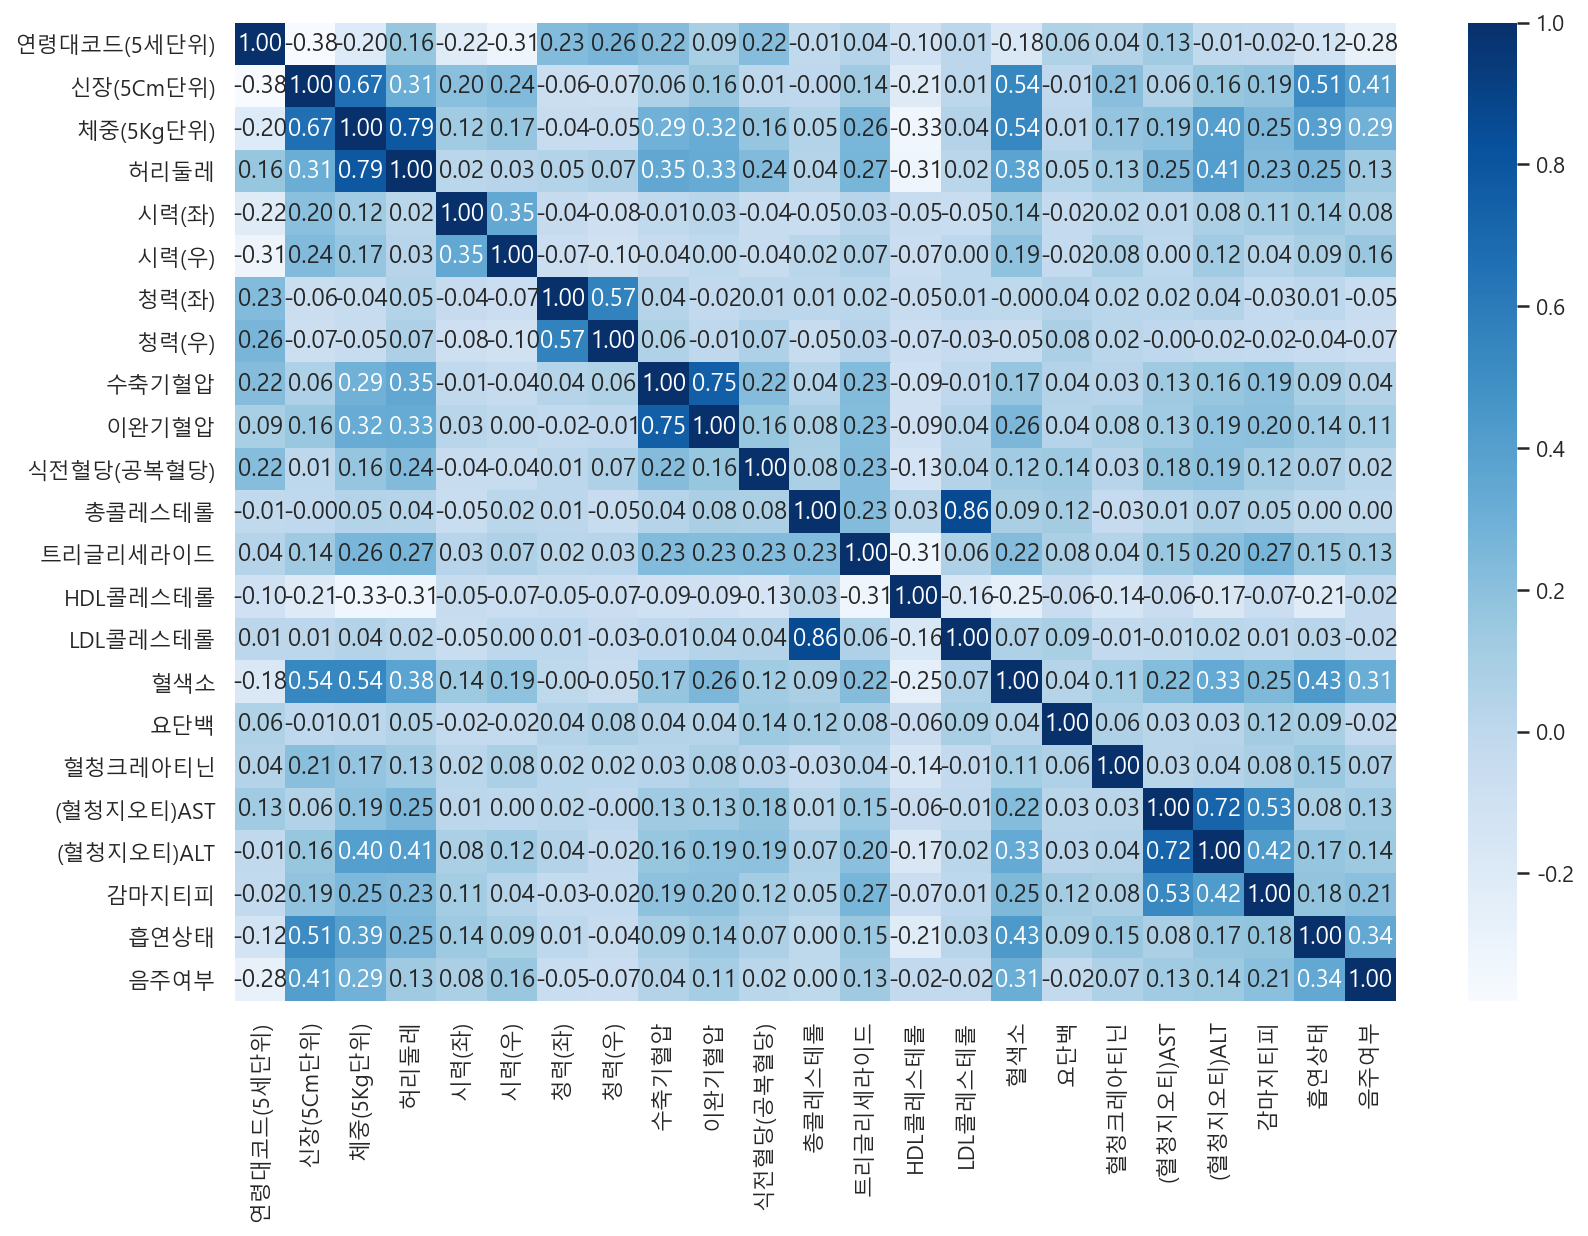

In [451]:
# 위에서 구한 상관계수를 heatmap화
plt.figure(figsize=(13,9))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

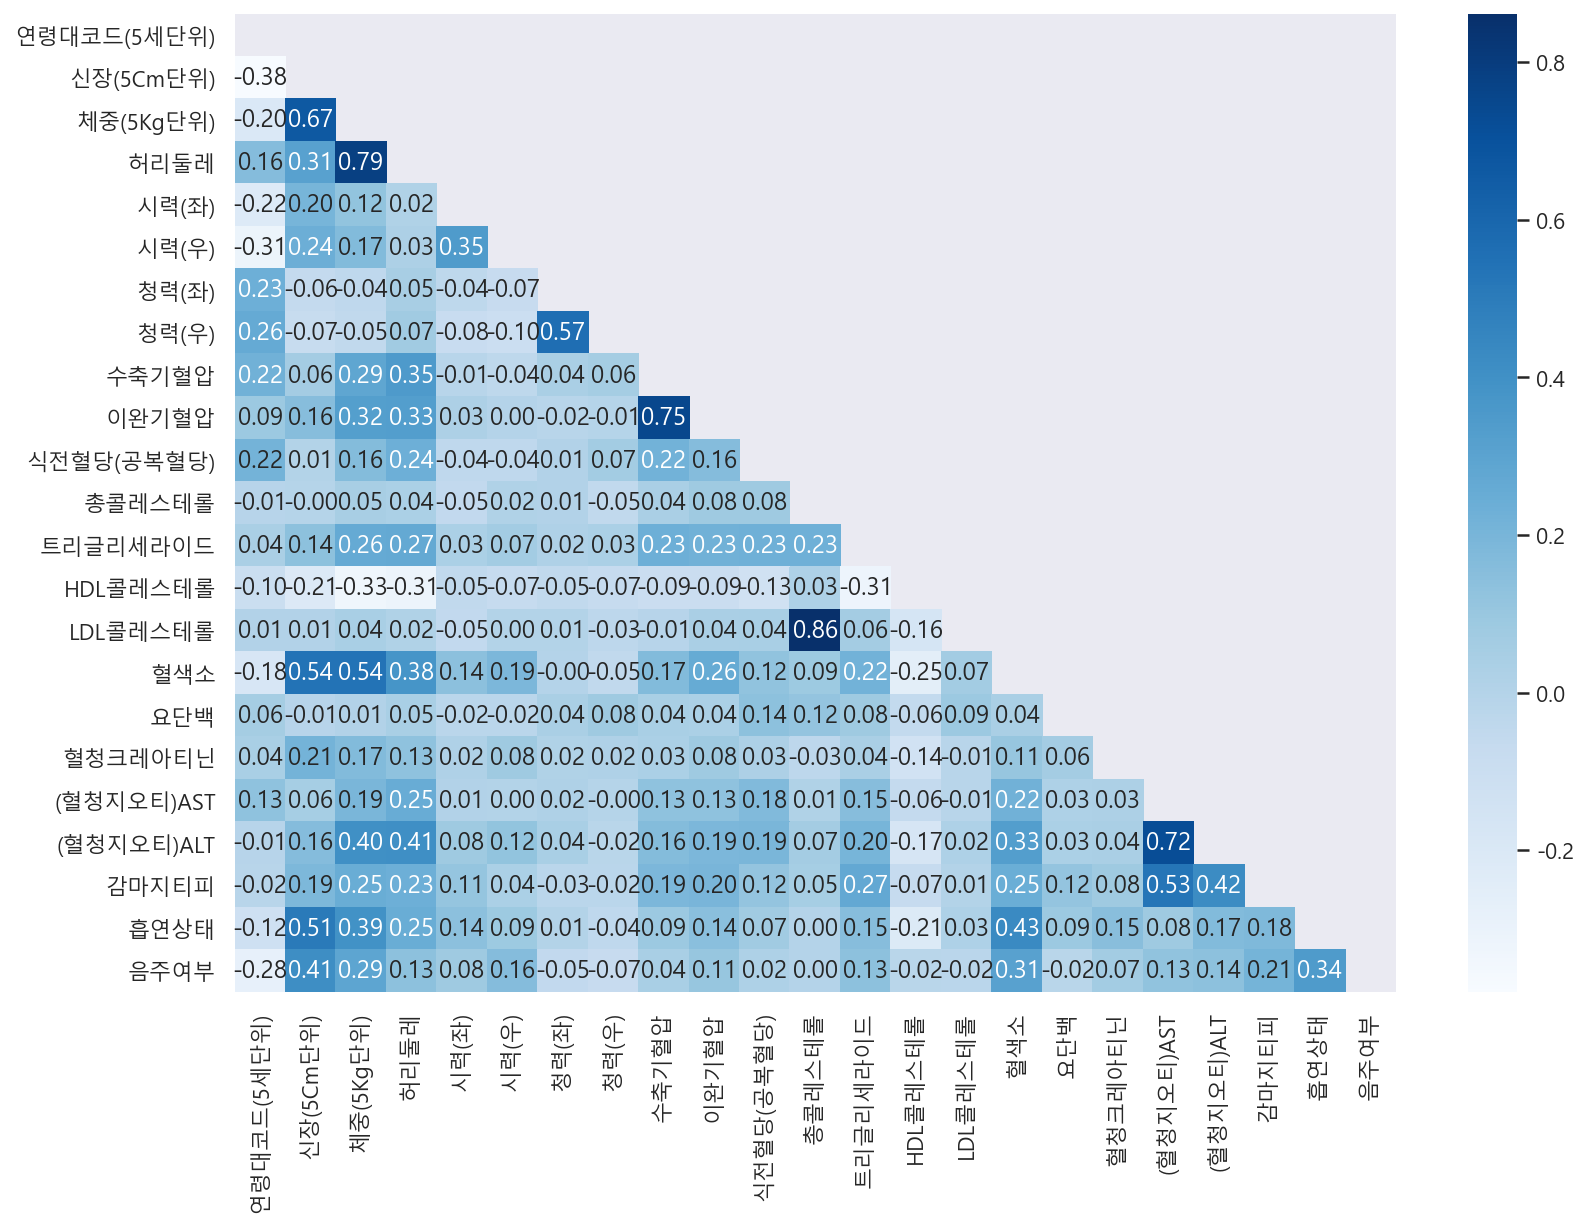

In [453]:
# mask 옵션 적용해보기
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

plt.figure(figsize=(13,9))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask = mask)